## Import Libraries

https://www.kaggle.com/datasets/tugberkkaran/used-car-listings-features-and-prices-carscom?select=train.csv

In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import random
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor#Split Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
from sklearn.pipeline import Pipeline

import timeit

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Data Understanding

In [3]:
df = pd.read_csv('train.csv', sep = ',')
df_test = pd.read_csv('test.csv', sep = ',')

In [4]:
df.head()

brand                      model    year  mileage  \
0       Mazda               CX-9 Touring  2022.0   6580.0   
1        Alfa  Romeo Stelvio 4DR SUV AWD  2018.0  62717.0   
2   Chevrolet  Silverado 1500 Limited LT  2022.0  15463.0   
3        Land  Rover Range Rover P400 SE  2022.0   1281.0   
4  Mitsubishi     Outlander Sport 2.0 SE  2021.0  36727.0   

                                      engine  engine_size       transmission  \
0                 2.5L I4 16V GDI DOHC Turbo          2.5  6-Speed Automatic   
1  Twin Turbo Premium Unleaded V-6 2.9 L/176          2.9          Automatic   
2                        5.3L V8 16V GDI OHV          5.3          Automatic   
3                 3.0L I6 24V GDI DOHC Turbo          3.0          Automatic   
4                      2.0L I4 16V MPFI DOHC          2.0      Automatic CVT   

   automatic_transmission fuel_type         drivetrain  ...  leather_seats  \
0                     1.0  Gasoline   Four-wheel Drive  ...            1.0   
1                     1.0  Gasoline   Four-wheel Drive  ...            0.0   
2                     1.0  Gasoline   Four-wheel Drive  ...            0.0   
3                     1.0  Gasoline   Four-wheel Drive  ...            1.0   
4                     1.0  Gasoline  Front-wheel Drive  ...            0.0   

   memory_seat  third_row_seating  apple_car_play/android_auto  bluetooth  \
0          0.0                1.0                          1.0        0.0   
1          1.0                0.0                          1.0        1.0   
2          0.0                0.0                          0.0        0.0   
3          1.0                0.0                          0.0        0.0   
4          0.0                0.0                          1.0        1.0   

   usb_port  heated_seats  interior_color               exterior_color   price  
0       0.0           1.0           Black        Snowflake White Pearl   36789  
1       0.0           0.0           Black  Rosso Competizione Tri-Coat   39993  
2       0.0           1.0       Jet Black          Silver Ice Metallic   46986  
3       0.0           1.0           Ebony                   Fuji White  141999  
4       1.0           1.0           Black                        White   21595  

[5 rows x 36 columns]

In [5]:
df_test.head(1)

brand             model    year  mileage                       engine  \
0  FIAT  124 Spider Lusso  2020.0  30830.0  1.4L I4 16V MPFI SOHC Turbo   

   engine_size       transmission  automatic_transmission fuel_type  \
0          1.4  6-Speed Automatic                     1.0  Gasoline   

         drivetrain  ...  leather_seats  memory_seat  third_row_seating  \
0  Rear-wheel Drive  ...            1.0          0.0                0.0   

   apple_car_play/android_auto  bluetooth  usb_port  heated_seats  \
0                          0.0        1.0       1.0           1.0   

   interior_color        exterior_color  price  
0          Saddle  Forte Black Metallic  26500  

[1 rows x 36 columns]

### Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19109 entries, 0 to 19108
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        19107 non-null  object 
 1   model                        19107 non-null  object 
 2   year                         19107 non-null  float64
 3   mileage                      19107 non-null  float64
 4   engine                       19062 non-null  object 
 5   engine_size                  17860 non-null  float64
 6   transmission                 19004 non-null  object 
 7   automatic_transmission       19107 non-null  float64
 8   fuel_type                    19107 non-null  object 
 9   drivetrain                   19107 non-null  object 
 10  min_mpg                      16103 non-null  float64
 11  max_mpg                      16103 non-null  float64
 12  damaged                      18940 non-null  float64
 13  first_owner     

### Data Atributes

* brand: Brand of the car.
* model: Model of the car.
* year: Year of production of the car.
* mileage: Mileage of the car.
* engine: Information about the car's engine.
* engine_size: Size of the car's engine.
* transmission: Type of transmission of the car.
* automatic_transmission: A binary value indicating the presence of automatic transmission (1: Yes, 0: No).
* fuel_type: Fuel type of the car.
* drivetrain: Drivetrain type of the car.
* min_mpg: Minimum fuel efficiency of the car.
* max_mpg: Maximum fuel efficiency of the car.
* damaged: A binary value indicating the presence of damage in the car (1: Yes, 0: No).
* first_owner: Is the car a 1-owner vehicle? (1: Yes, 0: No).
* personal_using: Is the car for personal use only? (1: Yes, 0: No).
* turbo: A binary value indicating the presence of a turbocharger in the car (1: Yes, 0: No).
* alloy_wheels: Are there alloy wheels on the car? (1: Yes, 0: No).
* adaptive_cruise_control: A binary value indicating the presence of adaptive cruise control (1: Yes, 0: No).
* navigation_system: A binary value indicating the presence of a navigation system (1: Yes, 0: No).
* power_liftgate: A binary value indicating the presence of a power liftgate (1: Yes, 0: No).
* backup_camera: A binary value indicating the presence of a backup camera (1: Yes, 0: No).
* keyless_start: A binary value indicating the presence of keyless start system (1: Yes, 0: No).
* remote_start: A binary value indicating the presence of a remote start system (1: Yes, 0: No).
* sunroof/moonroof: A binary value indicating the presence of a sunroof/moonroof (1: Yes, 0: No).
* automatic_emergency_braking: A binary value indicating the presence of automatic emergency braking system (1: Yes, 0: No).
* stability_control: A binary value indicating the presence of stability control system (1: Yes, 0: No).
* leather_seats: Are there leather seats in the car? (1: Yes, 0: No).
* memory_seat: Are there memory seats in the car? (1: Yes, 0: No).
* third_row_seating: A binary value indicating the presence of third row seating (1: Yes, 0: No).
* apple_car_play/android_auto: A binary value indicating the presence of Apple CarPlay / Android Auto integration (1: Yes, 0: No).
* bluetooth: A binary value indicating the presence of Bluetooth connectivity (1: Yes, 0: No).
* usb_port: A binary value indicating the presence of USB ports (1: Yes, 0: No).
* heated_seats: Are there heated seats in the car? (1: Yes, 0: No).
* interior_color: Interior color of the car.
* exterior_color: Exterior color of the car.
* price: Price of the car. This feature is the target feature of this dataset.

In [7]:
# Cek missing value pada masing-masing kolom
info_df = pd.DataFrame(df.isnull().sum(), columns=['#missing'])
info_df['% missing'] = (info_df['#missing'] / len(df)) * 100
info_df['# nunique'] = df.nunique()
info_df['dtype'] = df.dtypes
shorting_info_df = info_df.sort_values(by='#missing', ascending=False)
shorting_info_df

#missing  % missing  # nunique    dtype
max_mpg                          3006  15.730807         57  float64
min_mpg                          3006  15.730807         53  float64
engine_size                      1249   6.536187         62  float64
interior_color                   1157   6.054739        957   object
first_owner                       306   1.601340          2  float64
exterior_color                    209   1.093725       1941   object
personal_using                    189   0.989063          2  float64
damaged                           169   0.884400          2  float64
transmission                      105   0.549479        189   object
engine                             47   0.245957       1163   object
third_row_seating                   2   0.010466          2  float64
automatic_emergency_braking         2   0.010466          2  float64
stability_control                   2   0.010466          2  float64
leather_seats                       2   0.010466          2  float64
memory_seat                         2   0.010466          2  float64
brand                               2   0.010466         25   object
apple_car_play/android_auto         2   0.010466          2  float64
remote_start                        2   0.010466          2  float64
bluetooth                           2   0.010466          2  float64
usb_port                            2   0.010466          2  float64
heated_seats                        2   0.010466          2  float64
sunroof/moonroof                    2   0.010466          2  float64
navigation_system                   2   0.010466          2  float64
keyless_start                       2   0.010466          2  float64
backup_camera                       2   0.010466          2  float64
power_liftgate                      2   0.010466          2  float64
model                               2   0.010466       3498   object
adaptive_cruise_control             2   0.010466          2  float64
alloy_wheels                        2   0.010466          2  float64
turbo                               2   0.010466          2  float64
drivetrain                          2   0.010466          5   object
fuel_type                           2   0.010466         10   object
automatic_transmission              2   0.010466          2  float64
mileage                             2   0.010466      17412  float64
year                                2   0.010466         59  float64
price                               2   0.010466       9088   object

In [8]:
df.shape

(19109, 36)

### Statistical descriptive

In [9]:
target_var = 'price'
binary_vars = [col for col in df.columns if df[col].nunique() == 2]
cat_vars = [ col for col in df.columns if col not in binary_vars and df[col].dtype == "object"]
num_vars = [ col for col in df.columns if col not in binary_vars and df[col].dtype in ['int64', 'float64'] and col != target_var]

In [10]:
target_var

'price'

In [11]:
cat_vars

['brand',
 'model',
 'engine',
 'transmission',
 'fuel_type',
 'drivetrain',
 'interior_color',
 'exterior_color',
 'price']

In [12]:
binary_vars

['automatic_transmission',
 'damaged',
 'first_owner',
 'personal_using',
 'turbo',
 'alloy_wheels',
 'adaptive_cruise_control',
 'navigation_system',
 'power_liftgate',
 'backup_camera',
 'keyless_start',
 'remote_start',
 'sunroof/moonroof',
 'automatic_emergency_braking',
 'stability_control',
 'leather_seats',
 'memory_seat',
 'third_row_seating',
 'apple_car_play/android_auto',
 'bluetooth',
 'usb_port',
 'heated_seats']

In [13]:
num_vars

['year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg']

In [14]:
# Menampilkan nunique value pada setiap kolom
for col in df.columns:
    print(f"=== {col}===")
    display(df[col].value_counts())

=== brand===


Audi             855
Hyundai          843
Ford             835
Volvo            831
FIAT             813
Maserati         813
Volkswagen       812
Porsche          809
Jaguar           808
Honda            803
Cadillac         801
Nissan           795
Kia              792
Mercedes-Benz    788
Land             787
Mitsubishi       782
Mazda            780
Alfa             774
MINI             772
BMW              760
Lexus            755
Jeep             749
Chevrolet        735
Toyota           704
Suzuki           111
Name: brand, dtype: int64

=== model===


Romeo Giulia Ti                                              169
Romeo Stelvio Ti                                             160
500 Pop                                                      131
Ghibli S Q4                                                  109
Romeo Stelvio Base                                           107
                                                            ... 
Equator RMZ-4 Crew Cab                                         1
XT6 Luxury FWD                                                 1
Ghibli W DRIVER ASSISTANCE, NERISSIMO PKG, 20 INCH WHEELS      1
M440 Gran Coupe M440i Gran Coupe                               1
Crown Victoria LX                                              1
Name: model, Length: 3498, dtype: int64

=== year===


2020.0    2634
2022.0    2544
2019.0    2235
2021.0    2228
2018.0    1759
2017.0    1482
2016.0    1112
2023.0     959
2015.0     948
2014.0     685
2013.0     559
2012.0     478
2011.0     302
2010.0     180
2008.0     168
2009.0     154
2007.0     121
2006.0     107
2005.0      76
2004.0      64
2003.0      41
2002.0      39
2001.0      27
2000.0      22
1999.0      14
1994.0      14
1993.0      13
1991.0      13
1997.0      12
1995.0      11
1990.0      11
1992.0       9
1996.0       8
1984.0       7
1987.0       7
1986.0       6
2024.0       5
1989.0       5
1964.0       4
1998.0       4
1985.0       4
1973.0       4
1967.0       3
1972.0       3
1970.0       3
1976.0       3
1965.0       2
1969.0       2
1978.0       2
1980.0       2
1974.0       2
1977.0       2
1968.0       2
1966.0       1
1983.0       1
1971.0       1
1962.0       1
1979.0       1
1982.0       1
Name: year, dtype: int64

=== mileage===


35000.0     6
114000.0    6
15000.0     5
15358.0     5
67000.0     4
           ..
5392.0      1
61019.0     1
18384.0     1
98440.0     1
110107.0    1
Name: mileage, Length: 17412, dtype: int64

=== engine===


2.0L I4 16V GDI DOHC Turbo                                          2324
2.0L I4 16V GDI SOHC Turbo                                           638
3.0L V6 24V GDI DOHC Twin Turbo                                      628
Electric                                                             496
2.0L I4 16V MPFI DOHC                                                490
                                                                    ... 
565.0HP 3.8L V6 Cylinder Engine Gasoline Fuel                          1
3L V-6 diesel direct injection, DOHC, variable valve control, in       1
Theta II 2.4L I-4 DOHC, variable valve control, engine with 170H       1
5.8L V8 16V OHV                                                        1
Premium Unleaded V-8 5.6 L/339                                         1
Name: engine, Length: 1163, dtype: int64

=== engine_size===


2.0     4971
3.0     2222
3.5     1397
2.5     1303
3.6      967
        ... 
95.0       1
4.1        1
7.4        1
8.0        1
8.1        1
Name: engine_size, Length: 62, dtype: int64

=== transmission===


8-Speed Automatic                                   5403
6-Speed Automatic                                   3108
Automatic                                           2755
Automatic CVT                                       1585
9-Speed Automatic                                   1035
                                                    ... 
Auto, 6-Spd Steptronic                                 1
Single Speed                                           1
Automatic, 6-Spd w/Overdrive & Sportmatic              1
8-Speed Shiftable Automatic w/Sport Transmission       1
Auto, 7-Spd Dbl Clutch                                 1
Name: transmission, Length: 189, dtype: int64

=== automatic_transmission===


1.0    17523
0.0     1584
Name: automatic_transmission, dtype: int64

=== fuel_type===


Gasoline                  17207
Hybrid                      839
Electric                    518
Diesel                      248
E85 Flex Fuel               210
Unknown                      81
B                             1
flex_fuel                     1
Premium Unleaded              1
Compressed Natural Gas        1
Name: fuel_type, dtype: int64

=== drivetrain===


Four-wheel Drive     10824
Front-wheel Drive     5126
Rear-wheel Drive      3065
Unknown                 91
2WD                      1
Name: drivetrain, dtype: int64

=== min_mpg===


22.0    1633
17.0    1307
19.0    1277
18.0    1227
21.0    1120
20.0    1118
23.0    1106
16.0    1105
24.0    1011
15.0     932
25.0     704
26.0     569
14.0     434
13.0     423
27.0     380
28.0     371
31.0     238
29.0     221
30.0     209
0.0      179
12.0      74
35.0      60
33.0      52
11.0      32
36.0      31
38.0      30
32.0      26
43.0      20
41.0      20
40.0      20
39.0      19
34.0      15
48.0      14
72.0      14
37.0      13
45.0      12
47.0      11
46.0      11
54.0      10
49.0      10
57.0       7
50.0       5
10.0       4
42.0       4
44.0       4
52.0       4
89.0       4
51.0       4
58.0       3
53.0       3
80.0       1
76.0       1
61.0       1
Name: min_mpg, dtype: int64

=== max_mpg===


28.0     1336
30.0     1156
24.0     1118
27.0     1029
23.0     1027
25.0     1002
26.0      975
31.0      954
29.0      890
21.0      727
33.0      652
22.0      647
32.0      573
34.0      547
35.0      479
20.0      446
19.0      403
40.0      295
38.0      279
18.0      275
37.0      270
36.0      254
17.0      153
39.0      120
0.0        89
41.0       82
43.0       43
42.0       34
16.0       34
51.0       24
44.0       23
15.0       22
14.0       17
48.0       17
55.0       17
80.0       14
53.0       11
13.0       10
47.0        7
59.0        7
45.0        7
46.0        6
49.0        5
54.0        5
100.0       4
52.0        3
60.0        3
56.0        2
58.0        2
94.0        1
50.0        1
78.0        1
11.0        1
57.0        1
61.0        1
12.0        1
27.5        1
Name: max_mpg, dtype: int64

=== damaged===


0.0    14823
1.0     4117
Name: damaged, dtype: int64

=== first_owner===


1.0    9729
0.0    9074
Name: first_owner, dtype: int64

=== personal_using===


1.0    13590
0.0     5330
Name: personal_using, dtype: int64

=== turbo===


0.0    11383
1.0     7724
Name: turbo, dtype: int64

=== alloy_wheels===


1.0    17222
0.0     1885
Name: alloy_wheels, dtype: int64

=== adaptive_cruise_control===


0.0    14028
1.0     5079
Name: adaptive_cruise_control, dtype: int64

=== navigation_system===


1.0    9720
0.0    9387
Name: navigation_system, dtype: int64

=== power_liftgate===


0.0    12708
1.0     6399
Name: power_liftgate, dtype: int64

=== backup_camera===


1.0    12877
0.0     6230
Name: backup_camera, dtype: int64

=== keyless_start===


0.0    11619
1.0     7488
Name: keyless_start, dtype: int64

=== remote_start===


0.0    11467
1.0     7640
Name: remote_start, dtype: int64

=== sunroof/moonroof===


0.0    11243
1.0     7864
Name: sunroof/moonroof, dtype: int64

=== automatic_emergency_braking===


0.0    15775
1.0     3332
Name: automatic_emergency_braking, dtype: int64

=== stability_control===


1.0    18144
0.0      963
Name: stability_control, dtype: int64

=== leather_seats===


1.0    13310
0.0     5797
Name: leather_seats, dtype: int64

=== memory_seat===


0.0    9821
1.0    9286
Name: memory_seat, dtype: int64

=== third_row_seating===


0.0    16265
1.0     2842
Name: third_row_seating, dtype: int64

=== apple_car_play/android_auto===


0.0    11708
1.0     7399
Name: apple_car_play/android_auto, dtype: int64

=== bluetooth===


1.0    16625
0.0     2482
Name: bluetooth, dtype: int64

=== usb_port===


0.0    12390
1.0     6717
Name: usb_port, dtype: int64

=== heated_seats===


0.0    9834
1.0    9273
Name: heated_seats, dtype: int64

=== interior_color===


Black                                         7432
Gray                                           954
Ebony                                          672
Charcoal                                       660
Jet Black                                      621
                                              ... 
MANUFAKTUR Crystal White/Silver Grey Pearl       1
Tera Excl Dalbergia Brown                        1
Black Cloth/Vinyl Interior                       1
Ebony/Ebony/Light Oyster                         1
White / Black                                    1
Name: interior_color, Length: 957, dtype: int64

=== exterior_color===


Black                                        1405
White                                        1054
Gray                                          642
Silver                                        495
Blue                                          394
                                             ... 
Urano Gray Metallic                             1
Dark Cherry Pearl                               1
Velocity Yellow Tinted Clearcoat                1
WIND CHILL PEARL                                1
G manufaktur Dark Olive Green Magno Matte       1
Name: exterior_color, Length: 1941, dtype: int64

=== price===


29995    61
14995    60
16995    59
13995    57
18995    55
         ..
51770     1
41502     1
11271     1
26771     1
15382     1
Name: price, Length: 9088, dtype: int64

#### Numerical Data

In [15]:
df.describe().T

count          mean           std     min  \
year                         19107.0   2017.773120      4.996385  1962.0   
mileage                      19107.0  47947.087403  38285.061200     0.0   
engine_size                  17860.0      2.973191      5.478008     0.0   
automatic_transmission       19107.0      0.917098      0.275741     0.0   
min_mpg                      16103.0     20.827796      6.017846     0.0   
max_mpg                      16103.0     27.817270      6.513062     0.0   
damaged                      18940.0      0.217371      0.412468     0.0   
first_owner                  18803.0      0.517417      0.499710     0.0   
personal_using               18920.0      0.718288      0.449846     0.0   
turbo                        19107.0      0.404250      0.490759     0.0   
alloy_wheels                 19107.0      0.901345      0.298206     0.0   
adaptive_cruise_control      19107.0      0.265819      0.441780     0.0   
navigation_system            19107.0      0.508714      0.499937     0.0   
power_liftgate               19107.0      0.334903      0.471969     0.0   
backup_camera                19107.0      0.673941      0.468781     0.0   
keyless_start                19107.0      0.391898      0.488187     0.0   
remote_start                 19107.0      0.399853      0.489881     0.0   
sunroof/moonroof             19107.0      0.411577      0.492132     0.0   
automatic_emergency_braking  19107.0      0.174386      0.379451     0.0   
stability_control            19107.0      0.949600      0.218775     0.0   
leather_seats                19107.0      0.696603      0.459737     0.0   
memory_seat                  19107.0      0.486000      0.499817     0.0   
third_row_seating            19107.0      0.148741      0.355843     0.0   
apple_car_play/android_auto  19107.0      0.387240      0.487132     0.0   
bluetooth                    19107.0      0.870100      0.336202     0.0   
usb_port                     19107.0      0.351547      0.477466     0.0   
heated_seats                 19107.0      0.485320      0.499798     0.0   

                                 25%      50%      75%       max  
year                          2016.0   2019.0   2021.0    2024.0  
mileage                      19307.0  39141.0  68431.5  383614.0  
engine_size                      2.0      2.5      3.5     390.0  
automatic_transmission           1.0      1.0      1.0       1.0  
min_mpg                         17.0     20.0     24.0      89.0  
max_mpg                         24.0     28.0     31.0     100.0  
damaged                          0.0      0.0      0.0       1.0  
first_owner                      0.0      1.0      1.0       1.0  
personal_using                   0.0      1.0      1.0       1.0  
turbo                            0.0      0.0      1.0       1.0  
alloy_wheels                     1.0      1.0      1.0       1.0  
adaptive_cruise_control          0.0      0.0      1.0       1.0  
navigation_system                0.0      1.0      1.0       1.0  
power_liftgate                   0.0      0.0      1.0       1.0  
backup_camera                    0.0      1.0      1.0       1.0  
keyless_start                    0.0      0.0      1.0       1.0  
remote_start                     0.0      0.0      1.0       1.0  
sunroof/moonroof                 0.0      0.0      1.0       1.0  
automatic_emergency_braking      0.0      0.0      0.0       1.0  
stability_control                1.0      1.0      1.0       1.0  
leather_seats                    0.0      1.0      1.0       1.0  
memory_seat                      0.0      0.0      1.0       1.0  
third_row_seating                0.0      0.0      0.0       1.0  
apple_car_play/android_auto      0.0      0.0      1.0       1.0  
bluetooth                        1.0      1.0      1.0       1.0  
usb_port                         0.0      0.0      1.0       1.0  
heated_seats                     0.0      0.0      1.0       1.0

#### Categorical Data

In [16]:
# Statistic descriptive for object data
df.select_dtypes('object').describe().T

count unique                         top   freq
brand           19107     25                        Audi    855
model           19107   3498             Romeo Giulia Ti    169
engine          19062   1163  2.0L I4 16V GDI DOHC Turbo   2324
transmission    19004    189           8-Speed Automatic   5403
fuel_type       19107     10                    Gasoline  17207
drivetrain      19107      5            Four-wheel Drive  10824
interior_color  17952    957                       Black   7432
exterior_color  18900   1941                       Black   1405
price           19107   9088                       29995     61

## Data Preprocessing

### Missing value handling

In [17]:
# Cek missing value pada masing-masing kolom
info_df = pd.DataFrame(df.isnull().sum(), columns=['#missing'])
info_df['% missing'] = (info_df['#missing'] / len(df)) * 100
info_df['# nunique'] = df.nunique()
info_df['dtype'] = df.dtypes
info_df['Jumlah baris'] = df.shape[0]
info_df['Jumlah kolom'] = df.shape[1]
shorting_info_df = info_df.sort_values(by='#missing', ascending=False)
shorting_info_df

#missing  % missing  # nunique    dtype  \
max_mpg                          3006  15.730807         57  float64   
min_mpg                          3006  15.730807         53  float64   
engine_size                      1249   6.536187         62  float64   
interior_color                   1157   6.054739        957   object   
first_owner                       306   1.601340          2  float64   
exterior_color                    209   1.093725       1941   object   
personal_using                    189   0.989063          2  float64   
damaged                           169   0.884400          2  float64   
transmission                      105   0.549479        189   object   
engine                             47   0.245957       1163   object   
third_row_seating                   2   0.010466          2  float64   
automatic_emergency_braking         2   0.010466          2  float64   
stability_control                   2   0.010466          2  float64   
leather_seats                       2   0.010466          2  float64   
memory_seat                         2   0.010466          2  float64   
brand                               2   0.010466         25   object   
apple_car_play/android_auto         2   0.010466          2  float64   
remote_start                        2   0.010466          2  float64   
bluetooth                           2   0.010466          2  float64   
usb_port                            2   0.010466          2  float64   
heated_seats                        2   0.010466          2  float64   
sunroof/moonroof                    2   0.010466          2  float64   
navigation_system                   2   0.010466          2  float64   
keyless_start                       2   0.010466          2  float64   
backup_camera                       2   0.010466          2  float64   
power_liftgate                      2   0.010466          2  float64   
model                               2   0.010466       3498   object   
adaptive_cruise_control             2   0.010466          2  float64   
alloy_wheels                        2   0.010466          2  float64   
turbo                               2   0.010466          2  float64   
drivetrain                          2   0.010466          5   object   
fuel_type                           2   0.010466         10   object   
automatic_transmission              2   0.010466          2  float64   
mileage                             2   0.010466      17412  float64   
year                                2   0.010466         59  float64   
price                               2   0.010466       9088   object   

                             Jumlah baris  Jumlah kolom  
max_mpg                             19109            36  
min_mpg                             19109            36  
engine_size                         19109            36  
interior_color                      19109            36  
first_owner                         19109            36  
exterior_color                      19109            36  
personal_using                      19109            36  
damaged                             19109            36  
transmission                        19109            36  
engine                              19109            36  
third_row_seating                   19109            36  
automatic_emergency_braking         19109            36  
stability_control                   19109            36  
leather_seats                       19109            36  
memory_seat                         19109            36  
brand                               19109            36  
apple_car_play/android_auto         19109            36  
remote_start                        19109            36  
bluetooth                           19109            36  
usb_port                            19109            36  
heated_seats                        19109            36  
sunroof/moonroof                    19109            36  
navigation_system             

In [18]:
df = df.dropna().reset_index(drop=True)

In [19]:
# Cek missing value pada masing-masing kolom
info_df = pd.DataFrame(df.isnull().sum(), columns=['#missing'])
info_df['% missing'] = (info_df['#missing'] / len(df)) * 100
info_df['# nunique'] = df.nunique()
info_df['dtype'] = df.dtypes
info_df['Jumlah baris'] = df.shape[0]
info_df['Jumlah kolom'] = df.shape[1]
shorting_info_df = info_df.sort_values(by='#missing', ascending=False)
shorting_info_df

#missing  % missing  # nunique    dtype  \
brand                               0        0.0         25   object   
model                               0        0.0       2868   object   
backup_camera                       0        0.0          2  float64   
keyless_start                       0        0.0          2  float64   
remote_start                        0        0.0          2  float64   
sunroof/moonroof                    0        0.0          2  float64   
automatic_emergency_braking         0        0.0          2  float64   
stability_control                   0        0.0          2  float64   
leather_seats                       0        0.0          2  float64   
memory_seat                         0        0.0          2  float64   
third_row_seating                   0        0.0          2  float64   
apple_car_play/android_auto         0        0.0          2  float64   
bluetooth                           0        0.0          2  float64   
usb_port                            0        0.0          2  float64   
heated_seats                        0        0.0          2  float64   
interior_color                      0        0.0        822   object   
exterior_color                      0        0.0       1672   object   
power_liftgate                      0        0.0          2  float64   
navigation_system                   0        0.0          2  float64   
adaptive_cruise_control             0        0.0          2  float64   
fuel_type                           0        0.0          7   object   
year                                0        0.0         42  float64   
mileage                             0        0.0      13141  float64   
engine                              0        0.0        878   object   
engine_size                         0        0.0         56  float64   
transmission                        0        0.0        137   object   
automatic_transmission              0        0.0          2  float64   
drivetrain                          0        0.0          4   object   
alloy_wheels                        0        0.0          2  float64   
min_mpg                             0        0.0         51  float64   
max_mpg                             0        0.0         55  float64   
damaged                             0        0.0          2  float64   
first_owner                         0        0.0          2  float64   
personal_using                      0        0.0          2  float64   
turbo                               0        0.0          2  float64   
price                               0        0.0       7185   object   

                             Jumlah baris  Jumlah kolom  
brand                               14004            36  
model                               14004            36  
backup_camera                       14004            36  
keyless_start                       14004            36  
remote_start                        14004            36  
sunroof/moonroof                    14004            36  
automatic_emergency_braking         14004            36  
stability_control                   14004            36  
leather_seats                       14004            36  
memory_seat                         14004            36  
third_row_seating                   14004            36  
apple_car_play/android_auto         14004            36  
bluetooth                           14004            36  
usb_port                            14004            36  
heated_seats                        14004            36  
interior_color                      14004            36  
exterior_color                      14004            36  
power_liftgate                      14004            36  
navigation_system                   14004            36  
adaptive_cruise_control             14004            36  
fuel_type                           14004            36  
year                                14004            36  
mileage                       

### Duplicated values

In [20]:
#Count the number of duplicated rows
df.duplicated().sum()

0

### Cleaning & Feature engineering data

#### Convert target to numerical value

In [21]:
non_numeric_values = df['price'][~df['price'].astype(str).str.isnumeric()].unique()
print(non_numeric_values)

['ot Priced']


In [22]:
df[df.price == 'ot Priced'].head(3)

brand      model    year  mileage                           engine  \
42        FIAT  500 Sport  2012.0  79463.0            1.4L I4 16V MPFI SOHC   
718       FIAT    500 Pop  2012.0  53832.0            1.4L I4 16V MPFI SOHC   
1969  Maserati  MC20 Base  2022.0    547.0  3.0L V6 24V PDI DOHC Twin Turbo   

      engine_size                       transmission  automatic_transmission  \
42            1.4                  6-Speed Automatic                     1.0   
718           1.4                     5-Speed Manual                     0.0   
1969          3.0  8-Speed Automatic with Auto-Shift                     1.0   

     fuel_type         drivetrain  ...  leather_seats  memory_seat  \
42    Gasoline  Front-wheel Drive  ...            0.0          0.0   
718   Gasoline  Front-wheel Drive  ...            0.0          1.0   
1969  Gasoline   Rear-wheel Drive  ...            1.0          0.0   

      third_row_seating  apple_car_play/android_auto  bluetooth  usb_port  \
42                  0.0                          0.0        1.0       0.0   
718                 0.0                          0.0        1.0       0.0   
1969                0.0                          1.0        1.0       1.0   

      heated_seats  interior_color  exterior_color      price  
42             0.0           Black           Rosso  ot Priced  
718            0.0          Avorio          Copper  ot Priced  
1969           1.0           Black   Bianco Audace  ot Priced  

[3 rows x 36 columns]

In [23]:
# Menghapus baris dengan nilai "ot priced" pada kolom "price"
df = df[df['price'] != 'ot Priced']

# Mengubah tipe data kolom target menjadi float64
df['price'] = df['price'].astype('float64')

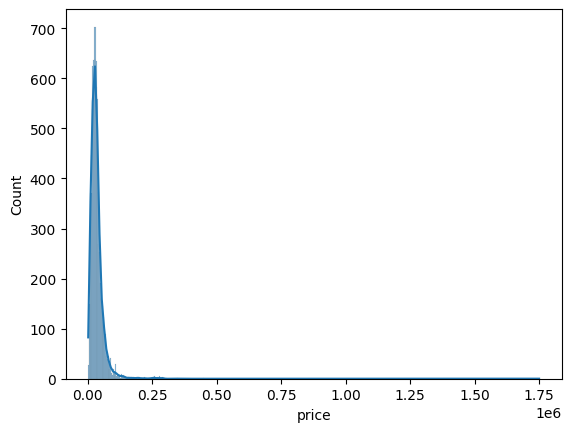

In [24]:
# plot hasil convert target variable
sns.histplot(df['price'], kde=True)
plt.show()

The **price** is extremely right-skewed so let's filter out some **outlier** values

#### Change Strings to Lowercase

In [25]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
print("after lower case entire dataframe\n",df)

after lower case entire dataframe
                brand                   model    year  mileage  \
0              honda   pilot special edition  2021.0  51299.0   
1      mercedes-benz  gl-class gl 450 4matic  2014.0  79279.0   
2         mitsubishi      outlander sport se  2021.0  31976.0   
3            porsche                     968  1994.0  92025.0   
4               mini          hardtop cooper  2016.0  43418.0   
...              ...                     ...     ...      ...   
13999     mitsubishi  outlander sport 2.0 es  2020.0  38386.0   
14000     volkswagen          tiguan 2.0t se  2022.0  10708.0   
14001          lexus             rc 350 base  2017.0  77886.0   
14002      chevrolet              camaro 2ss  2020.0  30921.0   
14003          honda            accord sport  2019.0  30840.0   

                                engine  engine_size        transmission  \
0                 3.5l v6 24v gdi sohc          3.5   9-speed automatic   
1      4.7l v8 32v gdi dohc twin t

* cat_vars

In [26]:
# Untuk mengetahui cat variable yang bisa dilakukan cleaning data
cat_vars

['brand',
 'model',
 'engine',
 'transmission',
 'fuel_type',
 'drivetrain',
 'interior_color',
 'exterior_color',
 'price']

#### Classify the brands based on their production countries

In [27]:
df.brand.unique()

array(['honda', 'mercedes-benz', 'mitsubishi', 'porsche', 'mini', 'land',
       'jeep', 'mazda', 'alfa', 'kia', 'jaguar', 'audi', 'toyota', 'bmw',
       'fiat', 'chevrolet', 'nissan', 'hyundai', 'maserati', 'volvo',
       'cadillac', 'lexus', 'ford', 'volkswagen', 'suzuki'], dtype=object)

In [28]:
# Membuat dictionary untuk menghubungkan brand dengan negara produksi
negara_produksi = {
    'honda': 'Japan',
    'mercedes-benz': 'German',
    'mitsubishi': 'Japan',
    'porsche': 'German',
    'mini': 'UK',
    'land': 'UK',
    'jeep': 'US',
    'mazda': 'Japan',
    'alfa': 'Italy',
    'kia': 'South Korea',
    'jaguar': 'UK',
    'audi': 'German',
    'toyota': 'Japan',
    'bmw': 'German',
    'fiat': 'Italy',
    'chevrolet': 'US',
    'nissan': 'Japan',
    'hyundai': 'South Korea',
    'maserati': 'Italy',
    'volvo': 'Sweden',
    'cadillac': 'US',
    'lexus': 'Japan',
    'ford': 'US',
    'volkswagen': 'German',
    'suzuki': 'Japan'
}

# Menambahkan kolom "country" berdasarkan dictionary negara produksi
df['country'] = df['brand'].map(negara_produksi)

In [29]:
df[['brand','country']].head()

brand country
0          honda   Japan
1  mercedes-benz  German
2     mitsubishi   Japan
3        porsche  German
4           mini      UK

In [30]:
df.country.value_counts()

Japan          3570
German         2975
US             2228
Italy          2008
UK             1540
South Korea    1142
Sweden          524
Name: country, dtype: int64

#### Model of the car

In [31]:
df.model.value_counts()

romeo giulia ti       144
romeo stelvio ti      143
500 pop               110
romeo stelvio base     93
ghibli s q4            91
                     ... 
prius v three           1
v70 r                   1
124 spider              1
xc90 b5 core            1
crown victoria lx       1
Name: model, Length: 2858, dtype: int64

Model mobil tidak dilakukan cleaning data karena masing masing value berupa unique

#### Transmission

In [32]:
df.transmission.value_counts()

8-speed automatic                   4482
6-speed automatic                   2460
automatic                           1457
automatic cvt                       1184
9-speed automatic                    866
                                    ... 
automatic cvt with sportronic          1
7-speed double-clutch                  1
continuously variable (cvti s)         1
6-speed aisin f21-250 auto             1
7g-tronic plus 7-speed automatic       1
Name: transmission, Length: 129, dtype: int64

In [33]:
df.automatic_transmission.value_counts()

1.0    12911
0.0     1076
Name: automatic_transmission, dtype: int64

* Transmission tidak akan dilakukan handling lebih jauh dikarenakan sudah berhubungan dengan kolom '''automatic_transmission'''

#### Fuel Types

Cleaning value flex_fuel

In [34]:
df.fuel_type.value_counts()

gasoline         13136
hybrid             564
e85 flex fuel      139
diesel             119
unknown             19
electric             9
flex_fuel            1
Name: fuel_type, dtype: int64

In [35]:
# Mengganti value pada kolom fuel_type pada e85 flex fuel menjadi flex_fuel
df['fuel_type'] = df['fuel_type'].replace('e85 flex fuel', 'flex_fuel')

In [36]:
df.fuel_type.value_counts()

gasoline     13136
hybrid         564
flex_fuel      140
diesel         119
unknown         19
electric         9
Name: fuel_type, dtype: int64

#### Drivetrain

In [37]:
df.drivetrain.value_counts()

four-wheel drive     7888
front-wheel drive    3822
rear-wheel drive     2239
unknown                38
Name: drivetrain, dtype: int64

In [38]:
# Mengganti nama kategori
df['drivetrain'] = df['drivetrain'].replace({
    'four-wheel drive': '4wd',
    'front-wheel drive': 'fwd',
    'rear-wheel drive': 'rwd',
    'unknown': 'unknown'
})

#### Colors

* Exterior color

In [39]:
filtered_df = df[df['exterior_color'].str.contains('black', na=False)]
filtered_df[['exterior_color']]

exterior_color
1      obsidian black metallic
12     midnight black metallic
13                       black
14               diamond black
18        forte black metallic
...                        ...
13996             shadow black
13997           jet black mica
13998  obsidian black metallic
14001           obsidian black
14002                    black

[3224 rows x 1 columns]

In [40]:
filtered_df = df[df['exterior_color'].str.contains('white', na=False)]
filtered_df[['exterior_color']]

exterior_color
3                       white
5                  fuji white
6      bright white clearcoat
9            snow white pearl
10                 fuji white
...                       ...
13993             pearl white
13995            pepper white
13999             pearl white
14000              pure white
14003                   white

[3147 rows x 1 columns]

In [41]:
filtered_df = df[df['exterior_color'].str.contains('blue', na=False)]
filtered_df[['exterior_color']]

exterior_color
4          electric blue metallic
16         phytonic blue metallic
26                     shark blue
28                   caspian blue
47           bright blue metallic
...                           ...
13941                  turbo blue
13946                  loire blue
13961        smokey blue metallic
13976    montecarlo blue metallic
13992  tanzanite blue ii metallic

[1285 rows x 1 columns]

In [42]:
filtered_df = df[df['exterior_color'].str.contains('red', na=False)]
filtered_df[['exterior_color']]

exterior_color
11                          passion red tintcoat
17                                           red
29                                           red
74     finish line red / midnight black metallic
115                      radiant red metallic ii
...                                          ...
13914                                        red
13922                           chili pepper red
13948                        aurora red metallic
13956                               hichroma red
13968                                   ruby red

[922 rows x 1 columns]

In [43]:
# Buat kolom "ex_color" dan isikan dengan nilai default 'unknown'
df['ex_color'] = 'unknown'

# Fungsi untuk mengisi nilai pada kolom "color" berdasarkan konten dari "exterior_color"
def assign_color(row):
    if 'black' in row['exterior_color']:
        return 'black'
    elif 'blue' in row['exterior_color']:
        return 'blue'
    elif 'red' in row['exterior_color']:
        return 'red'
    elif 'white' in row['exterior_color']:
        return 'white'
    elif 'brown' in row['exterior_color']:
        return 'brown'
    elif 'yellow' in row['exterior_color']:
        return 'yellow'
    elif 'silver' in row['exterior_color']:
        return 'silver'
    elif 'grey' in row['exterior_color']:
        return 'gray'
    elif 'gray' in row['exterior_color']:
        return 'gray'
    elif 'green' in row['exterior_color']:
        return 'green'
    elif 'nero' in row['exterior_color']:
        return 'green'
    elif 'rosso' in row['exterior_color']:
        return 'red'
    elif 'bianco' in row['exterior_color']:
        return 'white'
    elif 'metallic' in row['exterior_color']:
        return 'metallic'
    else:
        return 'other'

# Terapkan fungsi assign_color pada setiap baris di DataFrame
df['ex_color'] = df.apply(assign_color, axis=1)

In [44]:
filtered_df = df[df['ex_color'].str.contains('other', na=False)]
filtered_df[['exterior_color','ex_color']]

exterior_color ex_color
15     wind chill pearl    other
27                ebony    other
57                beige    other
67               caviar    other
71       starfire pearl    other
...                 ...      ...
13923      fresh powder    other
13937     grecian water    other
13945            copper    other
13950     fusion orange    other
13957  wind chill pearl    other

[945 rows x 2 columns]

In [45]:
# example ex_color output
df[['brand','exterior_color','ex_color']]

brand           exterior_color  ex_color
0              honda    modern steel metallic  metallic
1      mercedes-benz  obsidian black metallic     black
2         mitsubishi                   silver    silver
3            porsche                    white     white
4               mini   electric blue metallic      blue
...              ...                      ...       ...
13999     mitsubishi              pearl white     white
14000     volkswagen               pure white     white
14001          lexus           obsidian black     black
14002      chevrolet                    black     black
14003          honda                    white     white

[13987 rows x 3 columns]

In [46]:
df.ex_color.value_counts()

white       3262
black       3224
gray        1770
silver      1372
blue        1279
red         1078
other        945
metallic     617
green        333
brown         64
yellow        43
Name: ex_color, dtype: int64

* Interior color

In [47]:
filtered_df = df[df['interior_color'].str.contains('black', na=False)]
filtered_df[['interior_color']]

interior_color
0              black
1              black
4       carbon black
6              black
7              black
...              ...
13997          black
13998          black
14000          black
14001          black
14002      jet black

[8020 rows x 1 columns]

In [48]:
# Buat kolom "color" dan isikan dengan nilai default 'unknown'
df['in_color'] = 'unknown'

# Fungsi untuk mengisi nilai pada kolom "color" berdasarkan konten dari "interior_color"
def assign_color(row):
    if 'black' in row['interior_color']:
        return 'black'
    elif 'blue' in row['interior_color']:
        return 'blue'
    elif 'red' in row['interior_color']:
        return 'red'
    elif 'white' in row['interior_color']:
        return 'white'
    elif 'brown' in row['interior_color']:
        return 'brown'
    elif 'yellow' in row['interior_color']:
        return 'yellow'
    elif 'silver' in row['interior_color']:
        return 'silver'
    elif 'grey' in row['interior_color']:
        return 'gray'
    elif 'gray' in row['interior_color']:
        return 'gray'
    elif 'green' in row['interior_color']:
        return 'green'
    elif 'nero' in row['interior_color']:
        return 'green'
    elif 'rosso' in row['interior_color']:
        return 'red'
    elif 'bianco' in row['interior_color']:
        return 'white'
    elif 'metallic' in row['interior_color']:
        return 'metallic'
    else:
        return 'other'

# Terapkan fungsi assign_color pada setiap baris di DataFrame
df['in_color'] = df.apply(assign_color, axis=1)

In [49]:
df[['interior_color','in_color']]

interior_color in_color
0              black    black
1              black    black
2               gray     gray
3             saddle    other
4       carbon black    black
...              ...      ...
13999           gray     gray
14000          black    black
14001          black    black
14002      jet black    black
14003           gray     gray

[13987 rows x 2 columns]

In [50]:
filtered_df = df[df['in_color'].str.contains('other', na=False)]
filtered_df[['interior_color','in_color']]

interior_color in_color
3                         saddle    other
5      almond / espresso / ivory    other
10      ebony/ebony/light oyster    other
15                        cognac    other
22                         beige    other
...                          ...      ...
13980                 soft beige    other
13988                      steel    other
13989           medium parchment    other
13990         sienna tan / ebony    other
13996                      ebony    other

[3760 rows x 2 columns]

In [51]:
# example of output interior color
df[['brand','interior_color','in_color']]

brand interior_color in_color
0              honda          black    black
1      mercedes-benz          black    black
2         mitsubishi           gray     gray
3            porsche         saddle    other
4               mini   carbon black    black
...              ...            ...      ...
13999     mitsubishi           gray     gray
14000     volkswagen          black    black
14001          lexus          black    black
14002      chevrolet      jet black    black
14003          honda           gray     gray

[13987 rows x 3 columns]

In [52]:
df.in_color.value_counts()

black     8020
other     3760
gray      1058
red        404
green      314
brown      308
white       73
blue        37
silver      11
yellow       2
Name: in_color, dtype: int64

#### Backup Dataframe

In [53]:
df1 = df.copy()
df1.head(3)

brand                   model    year  mileage  \
0          honda   pilot special edition  2021.0  51299.0   
1  mercedes-benz  gl-class gl 450 4matic  2014.0  79279.0   
2     mitsubishi      outlander sport se  2021.0  31976.0   

                            engine  engine_size       transmission  \
0             3.5l v6 24v gdi sohc          3.5  9-speed automatic   
1  4.7l v8 32v gdi dohc twin turbo          4.7  7-speed automatic   
2            2.0l i4 16v mpfi dohc          2.0      automatic cvt   

   automatic_transmission fuel_type drivetrain  ...  \
0                     1.0  gasoline        4wd  ...   
1                     1.0  gasoline        4wd  ...   
2                     1.0  gasoline        4wd  ...   

   apple_car_play/android_auto  bluetooth  usb_port  heated_seats  \
0                          1.0        1.0       0.0           1.0   
1                          0.0        1.0       0.0           0.0   
2                          0.0        1.0       0.0           0.0   

   interior_color           exterior_color    price  country  ex_color  \
0           black    modern steel metallic  35999.0    Japan  metallic   
1           black  obsidian black metallic  22349.0   German     black   
2            gray                   silver  19499.0    Japan    silver   

   in_color  
0     black  
1     black  
2      gray  

[3 rows x 39 columns]

In [54]:
df1.columns

Index(['brand', 'model', 'year', 'mileage', 'engine', 'engine_size',
       'transmission', 'automatic_transmission', 'fuel_type', 'drivetrain',
       'min_mpg', 'max_mpg', 'damaged', 'first_owner', 'personal_using',
       'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system',
       'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
       'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
       'leather_seats', 'memory_seat', 'third_row_seating',
       'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats',
       'interior_color', 'exterior_color', 'price', 'country', 'ex_color',
       'in_color'],
      dtype='object')

* Check point

In [55]:
df = df1
df.head(3)

brand                   model    year  mileage  \
0          honda   pilot special edition  2021.0  51299.0   
1  mercedes-benz  gl-class gl 450 4matic  2014.0  79279.0   
2     mitsubishi      outlander sport se  2021.0  31976.0   

                            engine  engine_size       transmission  \
0             3.5l v6 24v gdi sohc          3.5  9-speed automatic   
1  4.7l v8 32v gdi dohc twin turbo          4.7  7-speed automatic   
2            2.0l i4 16v mpfi dohc          2.0      automatic cvt   

   automatic_transmission fuel_type drivetrain  ...  \
0                     1.0  gasoline        4wd  ...   
1                     1.0  gasoline        4wd  ...   
2                     1.0  gasoline        4wd  ...   

   apple_car_play/android_auto  bluetooth  usb_port  heated_seats  \
0                          1.0        1.0       0.0           1.0   
1                          0.0        1.0       0.0           0.0   
2                          0.0        1.0       0.0           0.0   

   interior_color           exterior_color    price  country  ex_color  \
0           black    modern steel metallic  35999.0    Japan  metallic   
1           black  obsidian black metallic  22349.0   German     black   
2            gray                   silver  19499.0    Japan    silver   

   in_color  
0     black  
1     black  
2      gray  

[3 rows x 39 columns]

### Handling Outlier

In [56]:
df.describe().T

count          mean           std     min  \
year                         13987.0   2017.819189      4.307033  1966.0   
mileage                      13987.0  49049.174376  37205.102425     0.0   
engine_size                  13987.0      2.881132      3.469572     0.0   
automatic_transmission       13987.0      0.923071      0.266488     0.0   
min_mpg                      13987.0     20.833345      5.848195     0.0   
max_mpg                      13987.0     27.837742      6.334603     0.0   
damaged                      13987.0      0.229141      0.420295     0.0   
first_owner                  13987.0      0.510688      0.499904     0.0   
personal_using               13987.0      0.718810      0.449596     0.0   
turbo                        13987.0      0.439408      0.496333     0.0   
alloy_wheels                 13987.0      0.918853      0.273070     0.0   
adaptive_cruise_control      13987.0      0.274255      0.446154     0.0   
navigation_system            13987.0      0.502109      0.500013     0.0   
power_liftgate               13987.0      0.338743      0.473299     0.0   
backup_camera                13987.0      0.684922      0.464564     0.0   
keyless_start                13987.0      0.400157      0.489948     0.0   
remote_start                 13987.0      0.411239      0.492076     0.0   
sunroof/moonroof             13987.0      0.416101      0.492928     0.0   
automatic_emergency_braking  13987.0      0.180596      0.384697     0.0   
stability_control            13987.0      0.963323      0.187974     0.0   
leather_seats                13987.0      0.711804      0.452939     0.0   
memory_seat                  13987.0      0.494388      0.499986     0.0   
third_row_seating            13987.0      0.159005      0.365694     0.0   
apple_car_play/android_auto  13987.0      0.390934      0.487977     0.0   
bluetooth                    13987.0      0.893901      0.307975     0.0   
usb_port                     13987.0      0.357260      0.479210     0.0   
heated_seats                 13987.0      0.489883      0.499916     0.0   
price                        13987.0  35647.460642  33693.309081  2498.0   

                                 25%      50%      75%        max  
year                          2016.0   2019.0   2021.0     2024.0  
mileage                      20994.5  40873.0  69674.0   361662.0  
engine_size                      2.0      2.5      3.5      390.0  
automatic_transmission           1.0      1.0      1.0        1.0  
min_mpg                         17.0     20.0     24.0       80.0  
max_mpg                         24.0     28.0     31.0       94.0  
damaged                          0.0      0.0      0.0        1.0  
first_owner                      0.0      1.0      1.0        1.0  
personal_using                   0.0      1.0      1.0        1.0  
turbo                            0.0      0.0      1.0        1.0  
alloy_wheels                     1.0      1.0      1.0        1.0  
adaptive_cruise_control          0.0      0.0      1.0        1.0  
navigation_system                0.0      1.0      1.0        1.0  
power_liftgate                   0.0      0.0      1.0        1.0  
backup_camera                    0.0      1.0      1.0        1.0  
keyless_start                    0.0      0.0      1.0        1.0  
remote_start                     0.0      0.0      1.0        1.0  
sunroof/moonroof                 0.0      0.0      1.0        1.0  
automatic_emergency_braking      0.0      0.0      0.0        1.0  
stability_control                1.0      1.0      1.0        1.0  
leather_seats                    0.0      1.0      1.0        1.0  
memory_seat                      0.0      0.0      1.0        1.0  
third_row_seating                0.0      0.0      0.0        1.0  
apple_car_play/android_auto      0.0      0.0      1.0        1.0  
bluetooth                        1.0      1.0      1.0        1.0  
usb_port                         0.0      0.0      1.0    

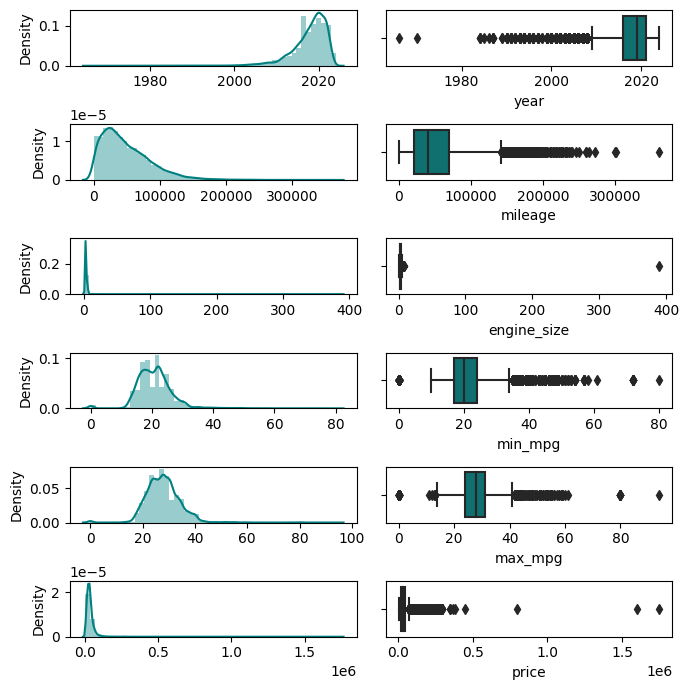

In [57]:
# Menampilkan outlier dengan melihat sebaran datanya
num = df[['year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg', 'price']]

features = list(num.columns)
fig, ax = plt.subplots(len(features),2,figsize=(7,7))

for idx, column in enumerate(features):
    sns.distplot(x=df[column], color='teal', ax=ax[idx][0])
    sns.boxplot(x=df[column], color='teal', ax=ax[idx][1])
    
plt.tight_layout()
plt.show()

* Observation:

Berdasarkan distribusi data tersebut, kolom yang memungkinkan memiliki outlier yang seharusnya untuk diberikan treatment tertentu adalah kolom engine_size dan kolom price

#### Handling engine size

In [58]:
# Check engine size yang sangat besar, dengan besaran treshold yaitu sebesar 10
filtered_df = df[df['engine_size'] >= 10]
filtered_df[['brand', 'model', 'year', 'mileage', 'engine','engine_size', 'transmission']]

brand             model    year  mileage engine  engine_size transmission
3908  ford  thunderbird base  1966.0  30625.0    390        390.0    automatic

"Ukuran mesin dalam dataframe sebesar 390 sebenarnya dinyatakan dalam satuan cubic inch (cu), sementara di dataframe digunakan satuan liter. Berdasarkan referensi, 390 cubic inch setara dengan 6.4 liter. Sebaliknya, kita bisa mengubah nilai 390 menjadi 6.4 agar sesuai dengan satuan yang digunakan dalam dataframe."

Resource:
https://en.wikipedia.org/wiki/Ford_Thunderbird_(fourth_generation)

In [59]:
# Mengganti value pada kolom engine dan engine_size dengan nilai konversi dari cu ke liter dari 390 cu menjadi 6.4 liter
df['engine'] = df['engine'].replace('390', '6.4')
df['engine_size'] = df['engine_size'].replace(390.0, 6.4)

In [60]:
# re-check
filtered_df = df[df['engine_size'] >= 10]
filtered_df[['brand', 'model', 'year', 'mileage', 'engine','engine_size', 'transmission']]

Empty DataFrame
Columns: [brand, model, year, mileage, engine, engine_size, transmission]
Index: []

In [61]:
# # Menyimpan DataFrame ke dalam file Excel
# df.to_excel('dataset1.xlsx', index=False)
# # Menyimpan DataFrame ke dalam file CSV
# df.to_csv('dataset1.csv', index=False)

#### Handling Price Column

Transformasi data merupakan teknik yang digunakan untuk mengubah distribusi data menjadi lebih sesuai dengan asumsi-asumsi analisis statistik, dan pada kolom price merupakan suatu kolom target, maka akan dilakukannya transformasi data menggunakan logaritma untuk mengubah distribusinya agar lebih sesuai

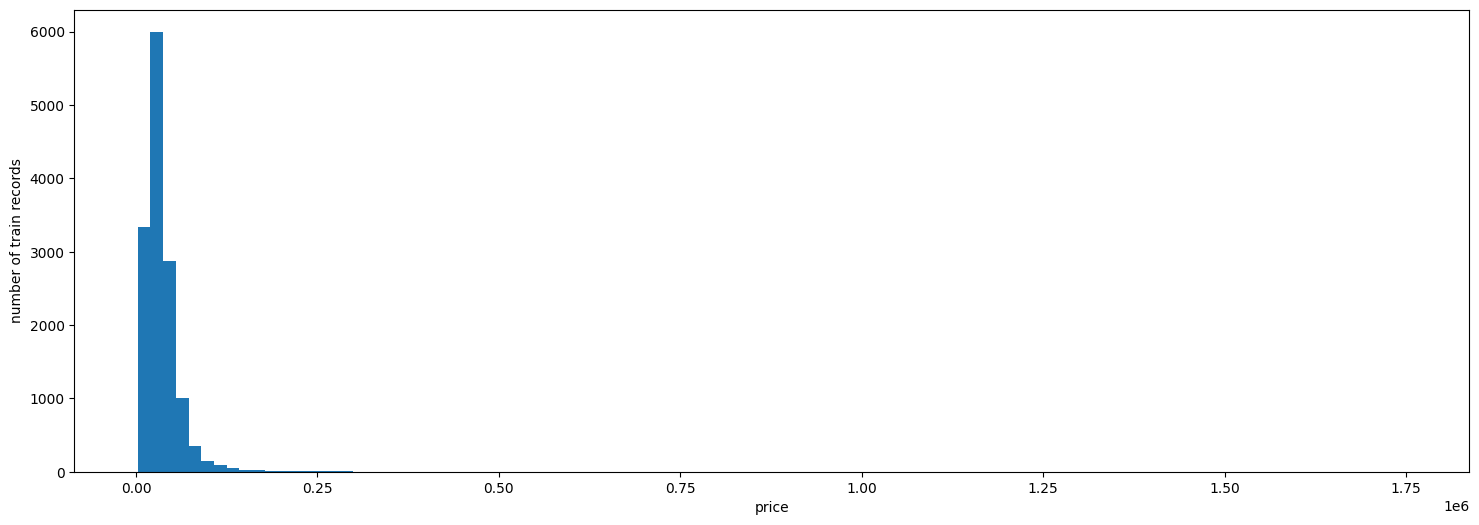

In [62]:
#Visualize the distribution of price values
plt.subplots(figsize=(18,6))
plt.hist(df['price'].values, bins=100)
plt.xlabel('price')
plt.ylabel('number of train records')
plt.show()

In [63]:
# Transformasi logaritma kolom price
df['log_price'] = np.log(df['price'])

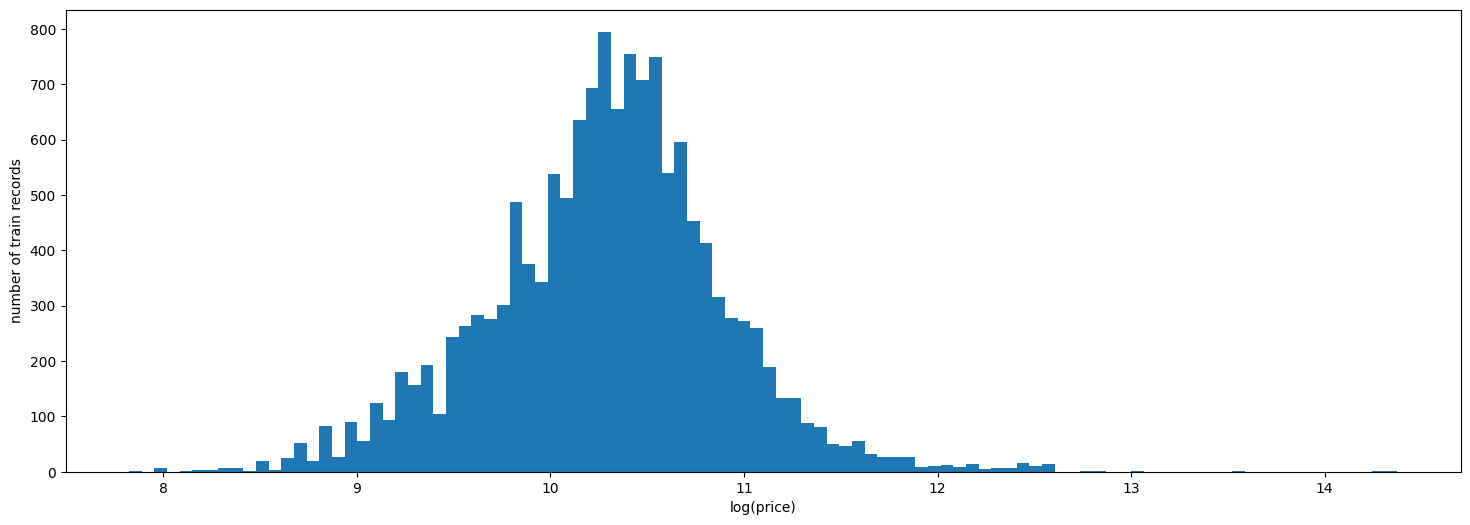

In [64]:
#Log-transformation
plt.subplots(figsize=(18,6))
plt.hist(df['log_price'].values, bins=100)
plt.xlabel('log(price)')
plt.ylabel('number of train records')
plt.show()

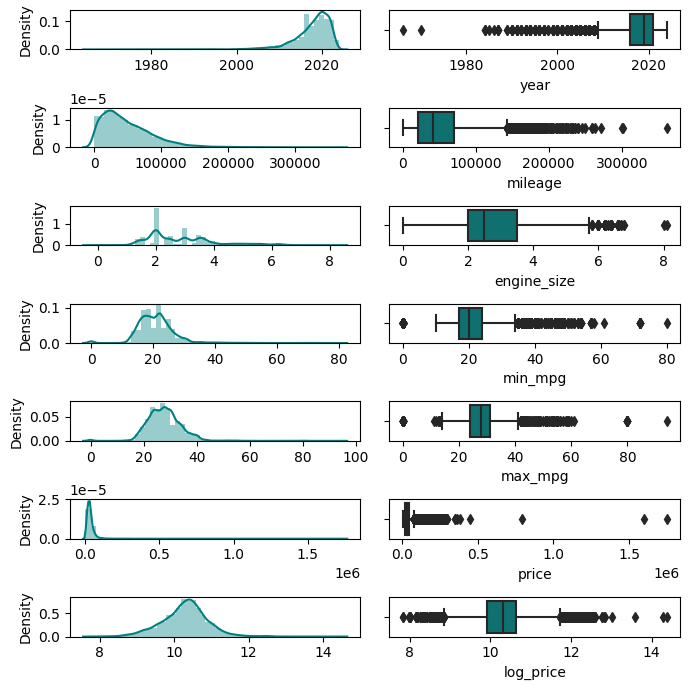

In [65]:
# Re-check outlier dengan melihat sebaran datanya
num = df[['year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg', 'price', 'log_price']]

features = list(num.columns)
fig, ax = plt.subplots(len(features),2,figsize=(7,7))

for idx, column in enumerate(features):
    sns.distplot(x=df[column], color='teal', ax=ax[idx][0])
    sns.boxplot(x=df[column], color='teal', ax=ax[idx][1])
    
plt.tight_layout()
plt.show()

* Re-checking after handling the outliers

In [66]:
df.describe().T

count          mean           std          min  \
year                         13987.0   2017.819189      4.307033  1966.000000   
mileage                      13987.0  49049.174376  37205.102425     0.000000   
engine_size                  13987.0      2.853707      1.150212     0.000000   
automatic_transmission       13987.0      0.923071      0.266488     0.000000   
min_mpg                      13987.0     20.833345      5.848195     0.000000   
max_mpg                      13987.0     27.837742      6.334603     0.000000   
damaged                      13987.0      0.229141      0.420295     0.000000   
first_owner                  13987.0      0.510688      0.499904     0.000000   
personal_using               13987.0      0.718810      0.449596     0.000000   
turbo                        13987.0      0.439408      0.496333     0.000000   
alloy_wheels                 13987.0      0.918853      0.273070     0.000000   
adaptive_cruise_control      13987.0      0.274255      0.446154     0.000000   
navigation_system            13987.0      0.502109      0.500013     0.000000   
power_liftgate               13987.0      0.338743      0.473299     0.000000   
backup_camera                13987.0      0.684922      0.464564     0.000000   
keyless_start                13987.0      0.400157      0.489948     0.000000   
remote_start                 13987.0      0.411239      0.492076     0.000000   
sunroof/moonroof             13987.0      0.416101      0.492928     0.000000   
automatic_emergency_braking  13987.0      0.180596      0.384697     0.000000   
stability_control            13987.0      0.963323      0.187974     0.000000   
leather_seats                13987.0      0.711804      0.452939     0.000000   
memory_seat                  13987.0      0.494388      0.499986     0.000000   
third_row_seating            13987.0      0.159005      0.365694     0.000000   
apple_car_play/android_auto  13987.0      0.390934      0.487977     0.000000   
bluetooth                    13987.0      0.893901      0.307975     0.000000   
usb_port                     13987.0      0.357260      0.479210     0.000000   
heated_seats                 13987.0      0.489883      0.499916     0.000000   
price                        13987.0  35647.460642  33693.309081  2498.000000   
log_price                    13987.0     10.285779      0.609823     7.823246   

                                      25%           50%           75%  \
year                          2016.000000   2019.000000   2021.000000   
mileage                      20994.500000  40873.000000  69674.000000   
engine_size                      2.000000      2.500000      3.500000   
automatic_transmission           1.000000      1.000000      1.000000   
min_mpg                         17.000000     20.000000     24.000000   
max_mpg                         24.000000     28.000000     31.000000   
damaged                          0.000000      0.000000      0.000000   
first_owner                      0.000000      1.000000      1.000000   
personal_using                   0.000000      1.000000      1.000000   
turbo                            0.000000      0.000000      1.000000   
alloy_wheels                     1.000000      1.000000      1.000000   
adaptive_cruise_control          0.000000      0.000000      1.000000   
navigation_system                0.000000      1.000000      1.000000   
power_liftgate                   0.000000      0.000000      1.000000   
backup_camera                    0.000000      1.000000      1.000000   
keyless_start                    0.000000      0.000000      1.000000   
remote_start                     0.000000      0.000000      1.000000   
sunroof/moonroof                 0.000000      0.000000      1.000000   
automatic_emergency_braking      0.000000      0.000000      0.000000   
stability_control                1.000000      1.000000      1.000000   
leather_seats                    0.000000      1.000000      1.0000

#### Backup Dataframe

In [67]:
# Reset index pada DataFrame df
df.reset_index(drop=True, inplace=True)

In [68]:
df1 = df.copy()
df1.head(3)

brand                   model    year  mileage  \
0          honda   pilot special edition  2021.0  51299.0   
1  mercedes-benz  gl-class gl 450 4matic  2014.0  79279.0   
2     mitsubishi      outlander sport se  2021.0  31976.0   

                            engine  engine_size       transmission  \
0             3.5l v6 24v gdi sohc          3.5  9-speed automatic   
1  4.7l v8 32v gdi dohc twin turbo          4.7  7-speed automatic   
2            2.0l i4 16v mpfi dohc          2.0      automatic cvt   

   automatic_transmission fuel_type drivetrain  ...  bluetooth  usb_port  \
0                     1.0  gasoline        4wd  ...        1.0       0.0   
1                     1.0  gasoline        4wd  ...        1.0       0.0   
2                     1.0  gasoline        4wd  ...        1.0       0.0   

   heated_seats  interior_color           exterior_color    price  country  \
0           1.0           black    modern steel metallic  35999.0    Japan   
1           0.0           black  obsidian black metallic  22349.0   German   
2           0.0            gray                   silver  19499.0    Japan   

   ex_color  in_color  log_price  
0  metallic     black  10.491246  
1     black     black  10.014537  
2    silver      gray   9.878118  

[3 rows x 40 columns]

* Run this check point

In [69]:
df = df1
df.head(3)

brand                   model    year  mileage  \
0          honda   pilot special edition  2021.0  51299.0   
1  mercedes-benz  gl-class gl 450 4matic  2014.0  79279.0   
2     mitsubishi      outlander sport se  2021.0  31976.0   

                            engine  engine_size       transmission  \
0             3.5l v6 24v gdi sohc          3.5  9-speed automatic   
1  4.7l v8 32v gdi dohc twin turbo          4.7  7-speed automatic   
2            2.0l i4 16v mpfi dohc          2.0      automatic cvt   

   automatic_transmission fuel_type drivetrain  ...  bluetooth  usb_port  \
0                     1.0  gasoline        4wd  ...        1.0       0.0   
1                     1.0  gasoline        4wd  ...        1.0       0.0   
2                     1.0  gasoline        4wd  ...        1.0       0.0   

   heated_seats  interior_color           exterior_color    price  country  \
0           1.0           black    modern steel metallic  35999.0    Japan   
1           0.0           black  obsidian black metallic  22349.0   German   
2           0.0            gray                   silver  19499.0    Japan   

   ex_color  in_color  log_price  
0  metallic     black  10.491246  
1     black     black  10.014537  
2    silver      gray   9.878118  

[3 rows x 40 columns]

## Exploratory Data Analysis and Visualization

In [70]:
df.head(4).T

0  \
brand                                        honda   
model                        pilot special edition   
year                                        2021.0   
mileage                                    51299.0   
engine                        3.5l v6 24v gdi sohc   
engine_size                                    3.5   
transmission                     9-speed automatic   
automatic_transmission                         1.0   
fuel_type                                 gasoline   
drivetrain                                     4wd   
min_mpg                                       19.0   
max_mpg                                       26.0   
damaged                                        0.0   
first_owner                                    1.0   
personal_using                                 1.0   
turbo                                          0.0   
alloy_wheels                                   1.0   
adaptive_cruise_control                        1.0   
navigation_system                              0.0   
power_liftgate                                 1.0   
backup_camera                                  1.0   
keyless_start                                  0.0   
remote_start                                   1.0   
sunroof/moonroof                               1.0   
automatic_emergency_braking                    1.0   
stability_control                              1.0   
leather_seats                                  1.0   
memory_seat                                    1.0   
third_row_seating                              1.0   
apple_car_play/android_auto                    1.0   
bluetooth                                      1.0   
usb_port                                       0.0   
heated_seats                                   1.0   
interior_color                               black   
exterior_color               modern steel metallic   
price                                      35999.0   
country                                      Japan   
ex_color                                  metallic   
in_color                                     black   
log_price                                10.491246   

                                                           1  \
brand                                          mercedes-benz   
model                                 gl-class gl 450 4matic   
year                                                  2014.0   
mileage                                              79279.0   
engine                       4.7l v8 32v gdi dohc twin turbo   
engine_size                                              4.7   
transmission                               7-speed automatic   
automatic_transmission                                   1.0   
fuel_type                                           gasoline   
drivetrain                                               4wd   
min_mpg                                                 21.0   
max_mpg                                                 28.0   
damaged                                                  0.0   
first_owner                                              0.0   
personal_using                                           1.0   
turbo                                                    1.0   
alloy_wheels                                             1.0   
adaptive_cruise_control                                  0.0   
navigation_system                                        1.0   
power_liftgate                                           1.0   
backup_camera                                            1.0   
keyless_start                                            0.0   
remote_start                                             0.0   
sunroof/moonroof                                         1.0   
automatic_emergency_braking                              0.0   
stability_control                                        1.0   
leather_seats                                            1.0   
memory_seat                               

### Univariate analysis

In [71]:
numericals = df.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df.select_dtypes(exclude=['int64','float64']).columns.tolist()

#### Numerical

In [72]:
numericals

['year',
 'mileage',
 'engine_size',
 'automatic_transmission',
 'min_mpg',
 'max_mpg',
 'damaged',
 'first_owner',
 'personal_using',
 'turbo',
 'alloy_wheels',
 'adaptive_cruise_control',
 'navigation_system',
 'power_liftgate',
 'backup_camera',
 'keyless_start',
 'remote_start',
 'sunroof/moonroof',
 'automatic_emergency_braking',
 'stability_control',
 'leather_seats',
 'memory_seat',
 'third_row_seating',
 'apple_car_play/android_auto',
 'bluetooth',
 'usb_port',
 'heated_seats',
 'price',
 'log_price']

##### Target Variable (price)

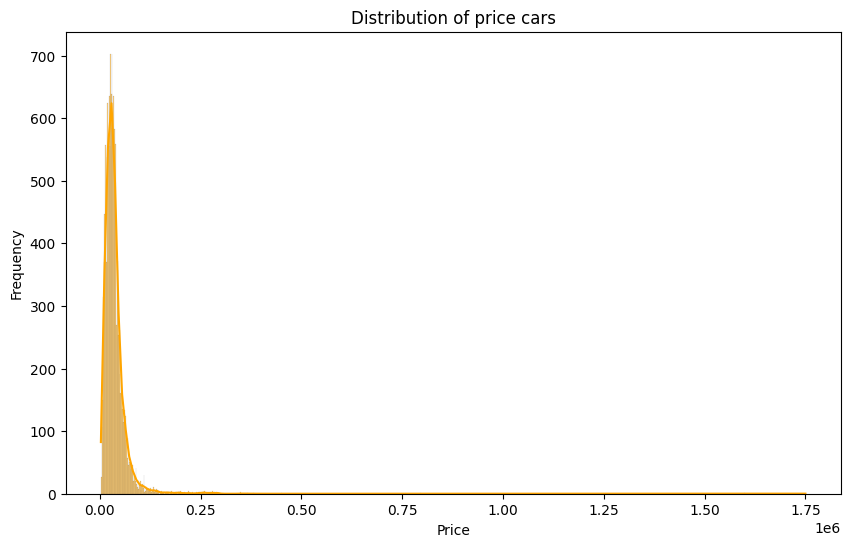

In [73]:
# Membuat histogram dari kolom 'price' dengan KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='orange')
plt.title('Distribution of price cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

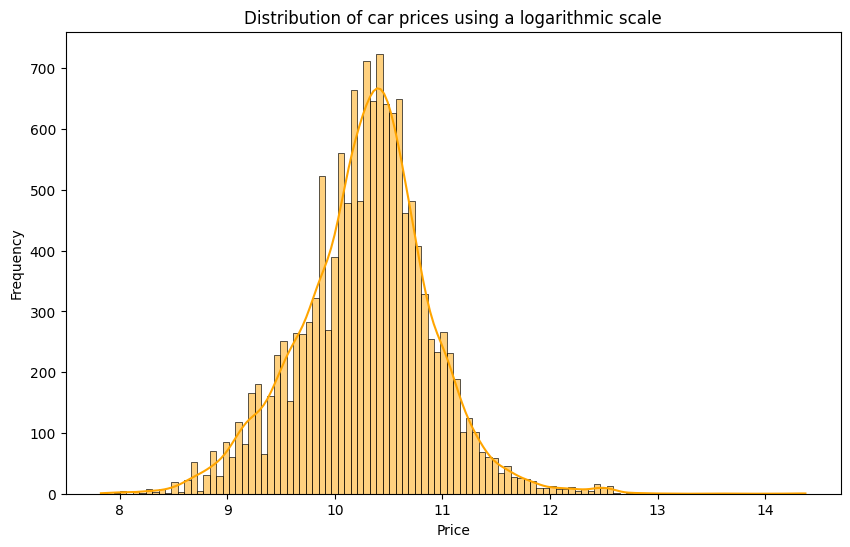

In [74]:
# Membuat histogram dari kolom 'price' dengan KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True, color='orange')
plt.title('Distribution of car prices using a logarithmic scale')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [75]:
from scipy import stats
def create_qq_plot_and_histogram(dataframe, column_name):
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=dataframe, x=column_name, kde=True)
    plt.title('Histogram')
    
    # QQ plot
    plt.subplot(1, 2, 2)
    stats.probplot(dataframe[column_name], plot=plt)
    plt.title('QQ Plot')
    
    plt.tight_layout()
    plt.show()

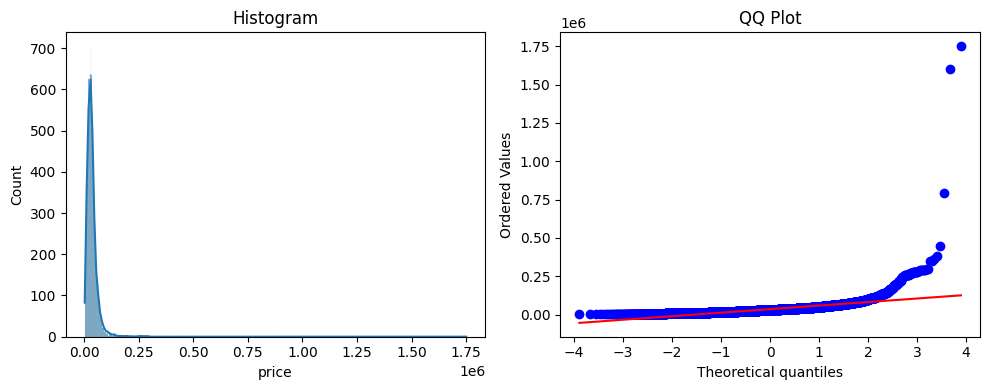

In [76]:
create_qq_plot_and_histogram(df, "price")

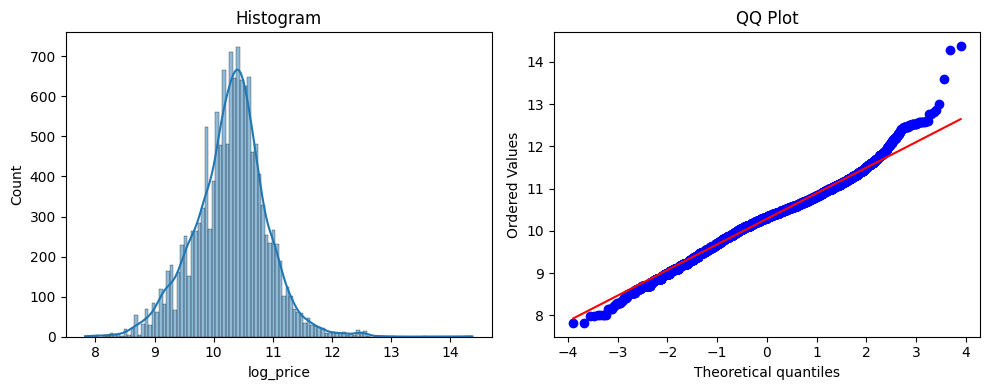

In [77]:
create_qq_plot_and_histogram(df, "log_price")

##### Distribution of Years

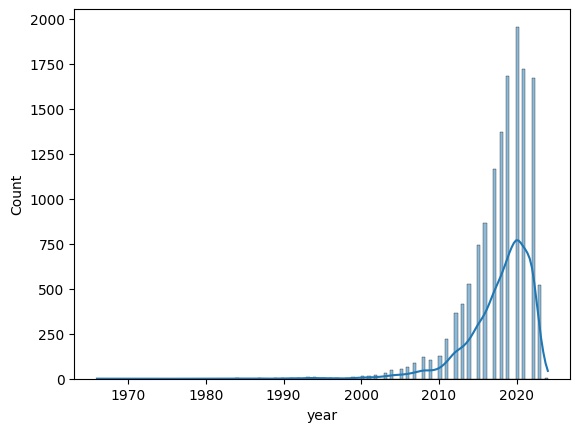

In [78]:
sns.histplot(df['year'], kde=True)
plt.show()

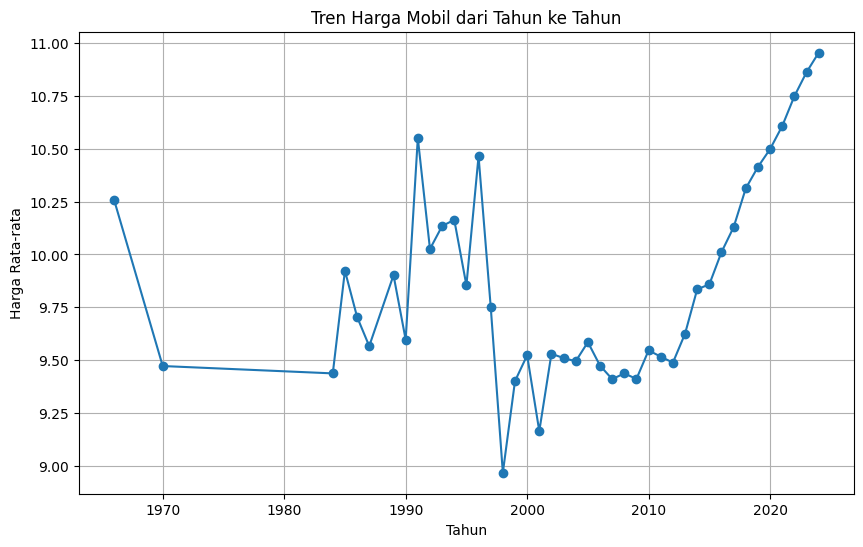

In [79]:
# Group data berdasarkan tahun dan menghitung harga rata-rata
yearly_price_avg = df.groupby('year')['log_price'].mean()

# Plot tren harga dari tahun ke tahun
plt.figure(figsize=(10, 6))
yearly_price_avg.plot(marker='o')
plt.title('Tren Harga Mobil dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Harga Rata-rata')
plt.grid(True)
plt.show()

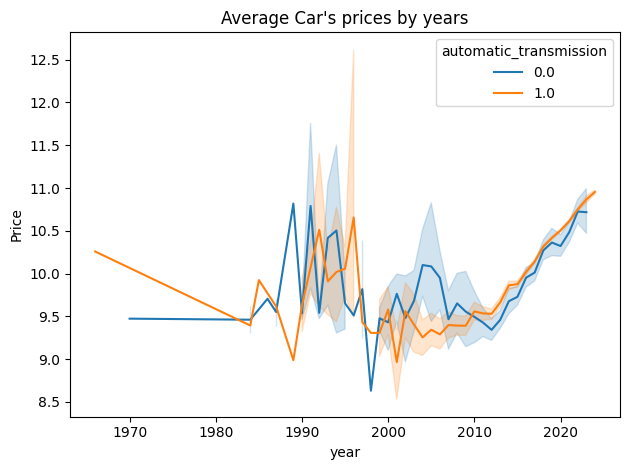

In [80]:
sns.lineplot(x='year',y='log_price',data=df,hue='automatic_transmission')
plt.title("Average Car's prices by years")
plt.ylabel('Price');
plt.tight_layout()
plt.show()

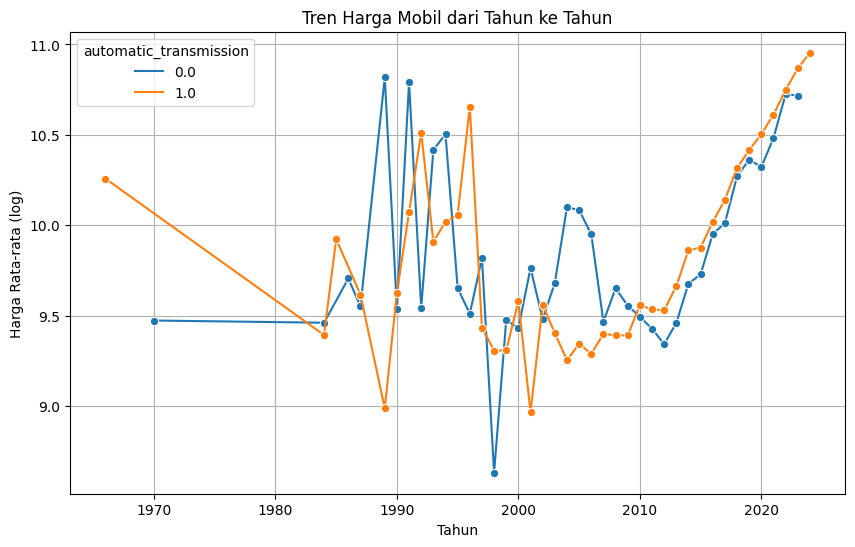

In [81]:
# Group data berdasarkan tahun dan menghitung harga rata-rata
yearly_price_avg = df.groupby(['year', 'automatic_transmission'])['log_price'].mean().reset_index()

# Plot tren harga dari tahun ke tahun dengan hue automatic_transmission
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_price_avg, x='year', y='log_price', hue='automatic_transmission', marker='o')
plt.title('Tren Harga Mobil dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Harga Rata-rata (log)')
plt.grid(True)
plt.show()

##### Distribution of automatic_transmission

In [82]:
df.automatic_transmission.value_counts()

1.0    12911
0.0     1076
Name: automatic_transmission, dtype: int64

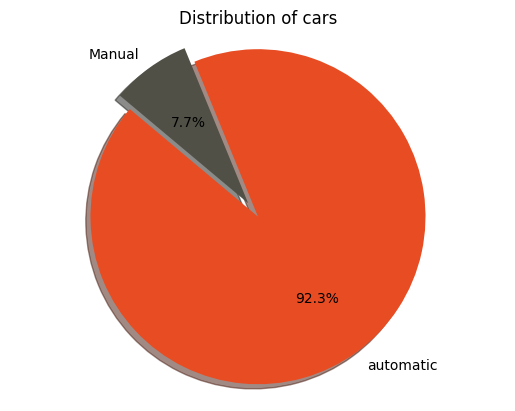

In [83]:
# Menghitung jumlah mobil dengan automatic_transmission = 1 dan automatic_transmission = 0
count_matic = df[df['automatic_transmission'] == 1].shape[0]
count_non_matic = df[df['automatic_transmission'] == 0].shape[0]

# Data untuk diagram lingkaran
labels = ['automatic', 'Manual']
sizes = [count_matic, count_non_matic]
colors = ['#E84C22', '#505046']
explode = (0.1, 0)

# Membuat diagram lingkaran
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

# Menampilkan diagram lingkaran
plt.title('Distribution of cars')
plt.show()

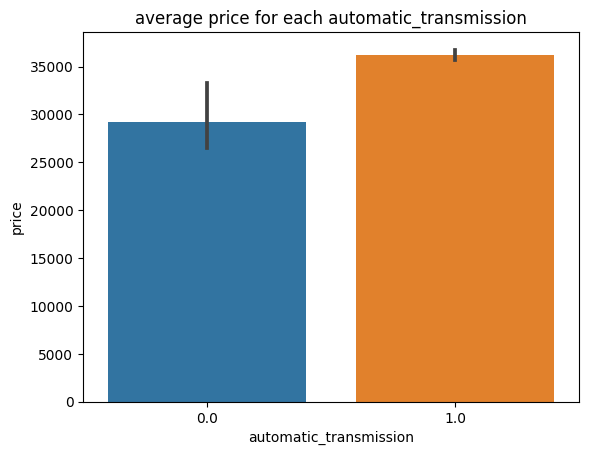

In [84]:
sns.barplot(x='automatic_transmission',y='price',data=df)
plt.title("average price for each automatic_transmission")
plt.ylabel('price');

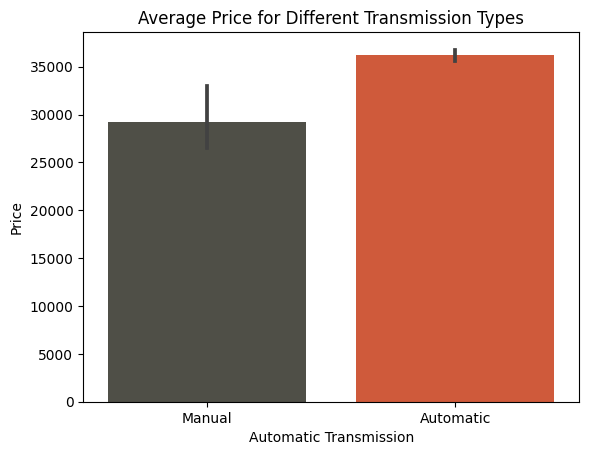

In [85]:
# Menentukan palet warna sesuai dengan tipe transmisi
palette_colors = {'#505046','#E84C22'}

# Membuat bar plot menggunakan Seaborn
ax = sns.barplot(x='automatic_transmission', y='price', data=df, palette=palette_colors)

# Menambahkan label pada sumbu x
ax.set_xticklabels(['Manual', 'Automatic'])

plt.title("Average Price for Different Transmission Types")
plt.ylabel('Price')
plt.xlabel('Automatic Transmission')
plt.show()

##### Price by fuel types

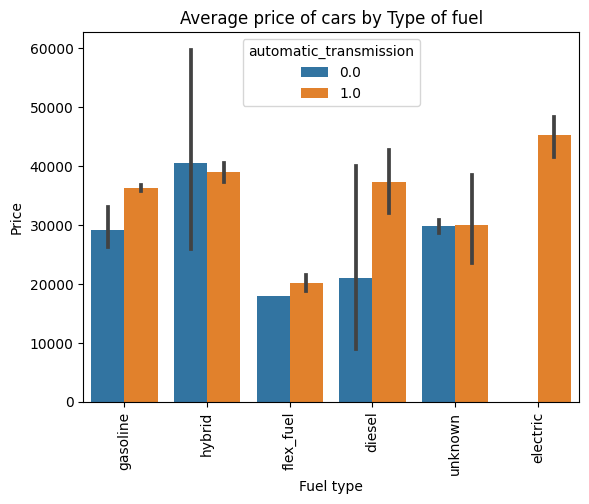

In [86]:
sns.barplot(x='fuel_type',y='price',data=df,hue='automatic_transmission')
plt.xlabel("Fuel type")
plt.title("Average price of cars by Type of fuel")
plt.ylabel('Price')
plt.xticks(rotation=90);

* Scatter plot price

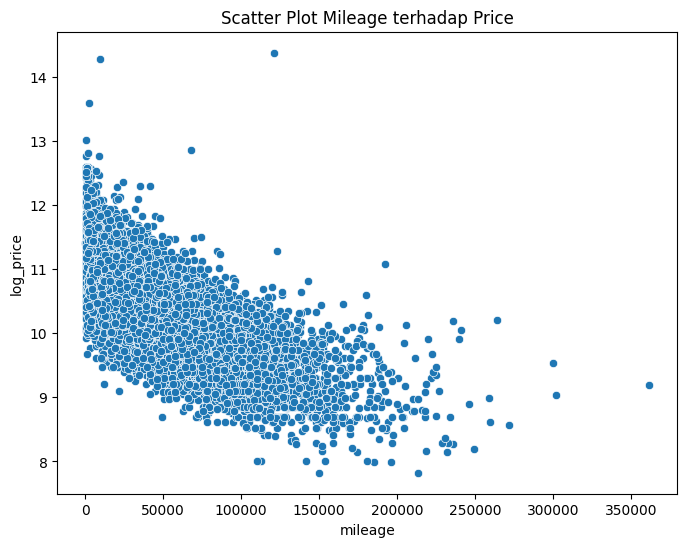

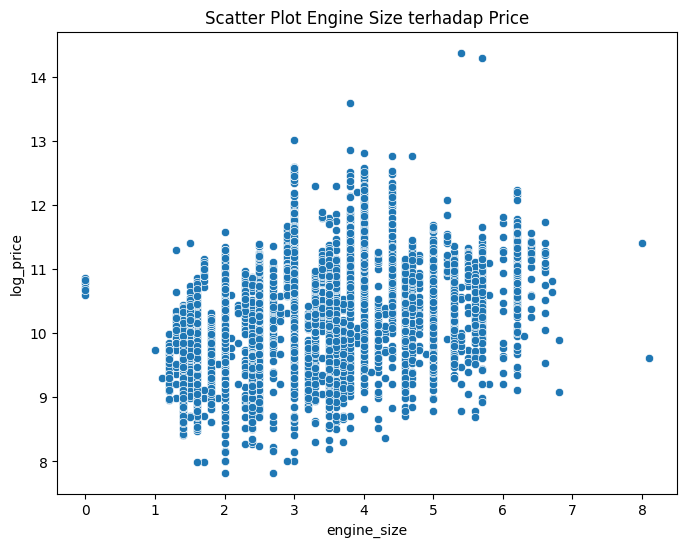

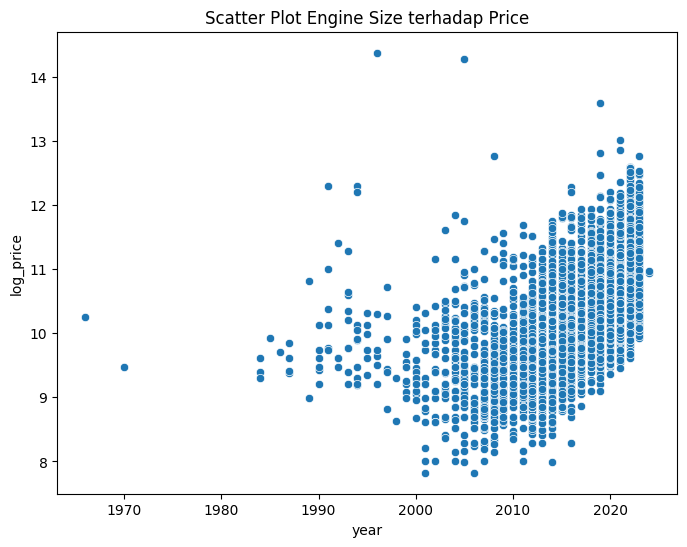

In [87]:
# Scatter plot mileage terhadap price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='log_price', data=df)
plt.title('Scatter Plot Mileage terhadap Price')
plt.show()

# Scatter plot engine_size terhadap price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine_size', y='log_price', data=df)
plt.title('Scatter Plot Engine Size terhadap Price')
plt.show()

# Scatter plot engine_size terhadap price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='log_price', data=df)
plt.title('Scatter Plot Engine Size terhadap Price')
plt.show()

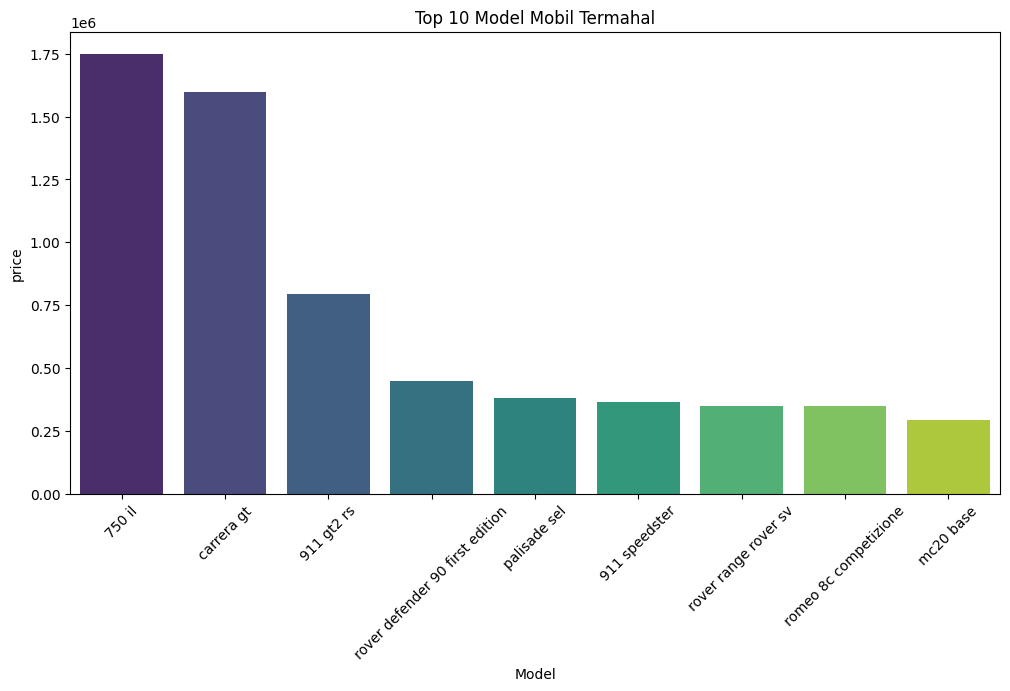

In [88]:
# Mengurutkan DataFrame berdasarkan kolom price secara menurun
df_sorted = df.sort_values(by='price', ascending=False)

# Mengambil 10 data pertama (top 10 model termahal)
top_10_models = df_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='price', data=top_10_models, palette='viridis')
plt.title('Top 10 Model Mobil Termahal')
plt.xlabel('Model')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

* Dist. of mileage

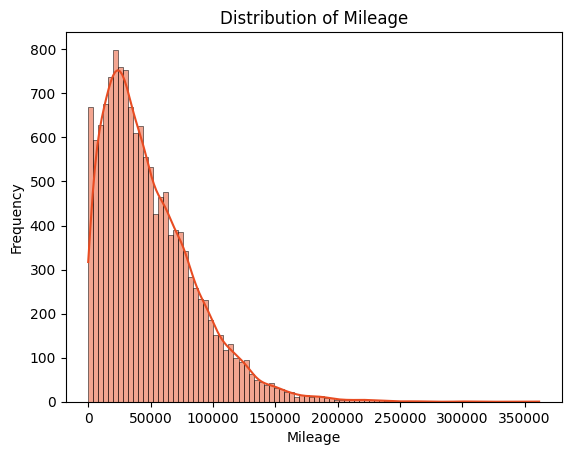

In [89]:
# Membuat histogram menggunakan Seaborn dengan warna hex orange
sns.histplot(df['mileage'], kde=True, color='#E84C22')

plt.title("Distribution of Mileage")
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

* Dist of color

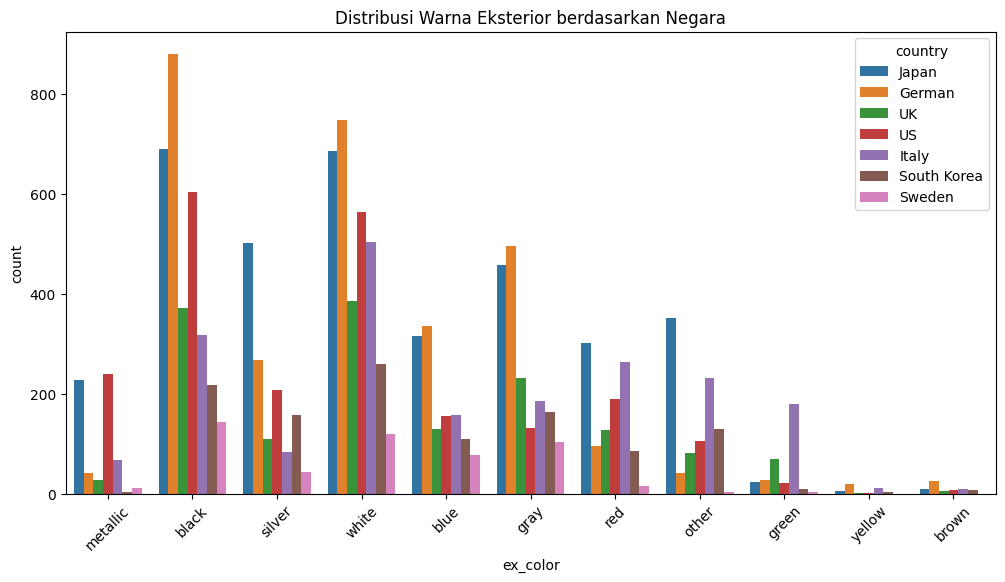

In [90]:
# Analisis distribusi warna eksterior berdasarkan negara
plt.figure(figsize=(12, 6))
sns.countplot(x='ex_color', hue='country', data=df)
plt.title('Distribusi Warna Eksterior berdasarkan Negara')
plt.xticks(rotation=45)
plt.show()

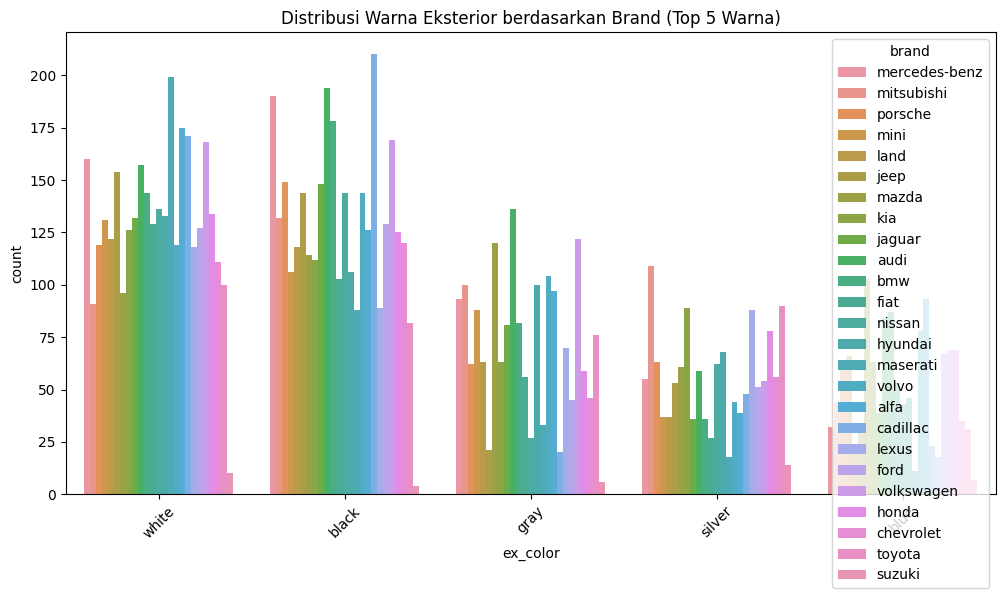

In [91]:
# Menghitung jumlah warna eksterior untuk setiap brand
color_counts = df['ex_color'].value_counts()

# Mengambil 5 warna eksterior teratas
top_colors = color_counts.head(5).index

# Filter DataFrame untuk warna eksterior teratas
df_top_colors = df[df['ex_color'].isin(top_colors)]

# Membuat count plot distribusi warna eksterior berdasarkan brand
plt.figure(figsize=(12, 6))
sns.countplot(x='ex_color', hue='brand', data=df_top_colors, order=top_colors)
plt.title('Distribusi Warna Eksterior berdasarkan Brand (Top 5 Warna)')
plt.xticks(rotation=45)
plt.show()

* engine size

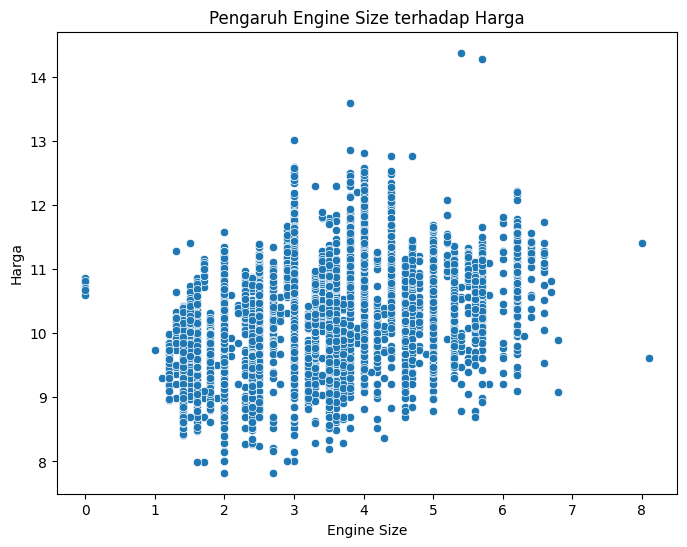

In [92]:
# Membuat scatter plot engine_size terhadap price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine_size', y='log_price', data=df)
plt.title('Pengaruh Engine Size terhadap Harga')
plt.xlabel('Engine Size')
plt.ylabel('Harga')
plt.show()

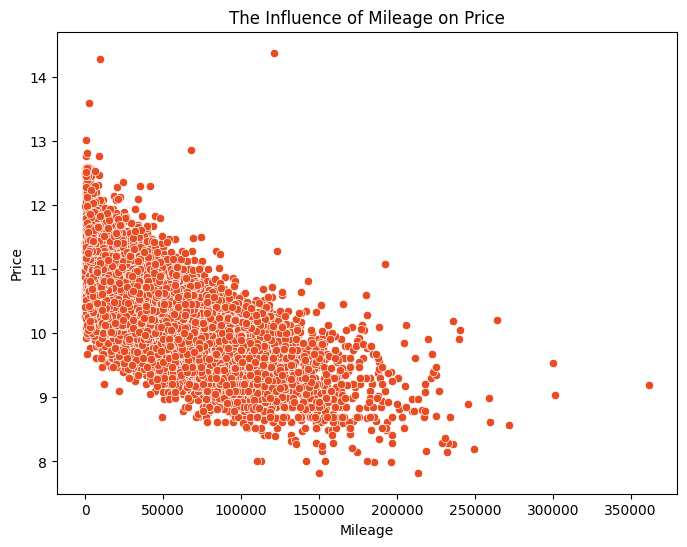

In [93]:
# Membuat scatter plot mileage terhadap price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='log_price', data=df, color='#E84C22')
plt.title('The Influence of Mileage on Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

#### Cardinality

In [94]:
df[categoricals].nunique()

brand               25
model             2858
engine             878
transmission       129
fuel_type            6
drivetrain           4
interior_color     811
exterior_color    1652
country              7
ex_color            11
in_color            10
dtype: int64

In [95]:
card = ["brand", "fuel_type", "drivetrain", 'country', 'ex_color', 'in_color']

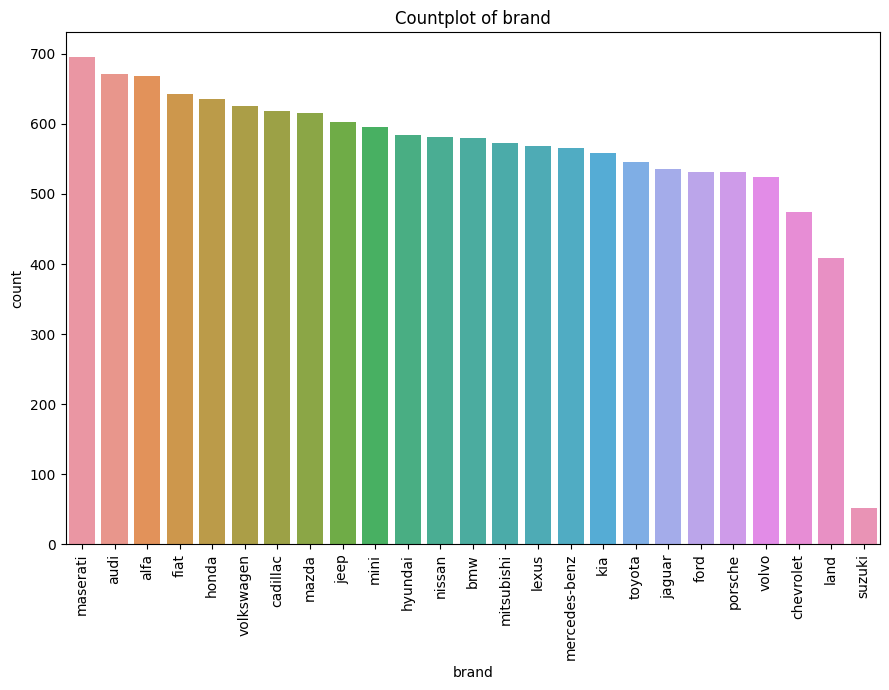

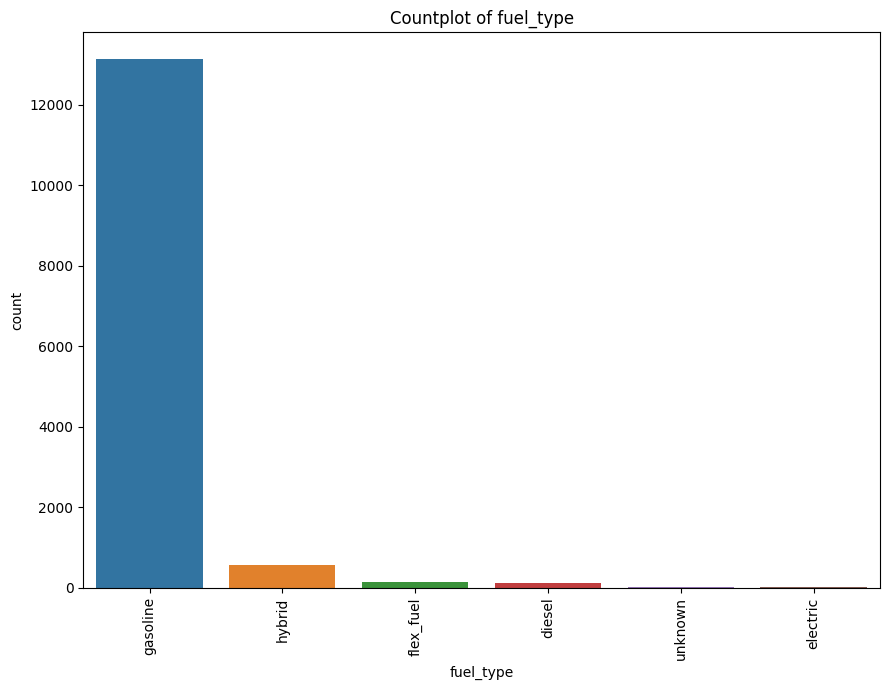

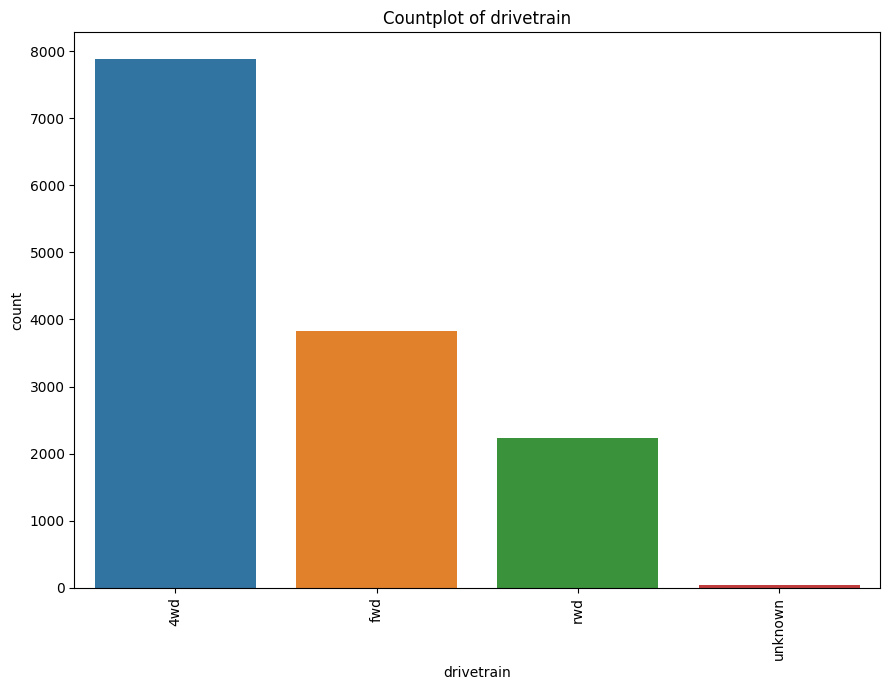

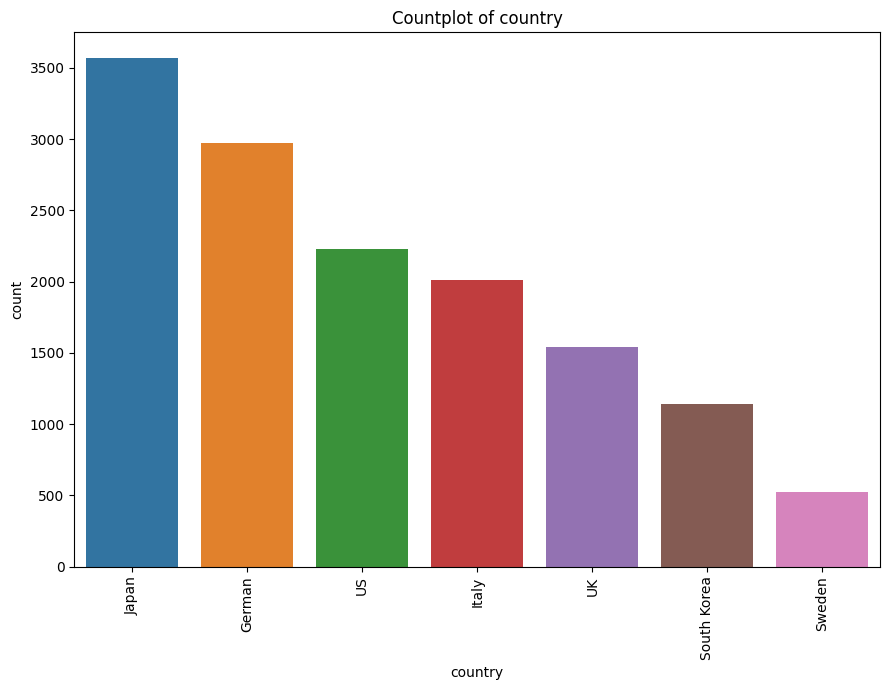

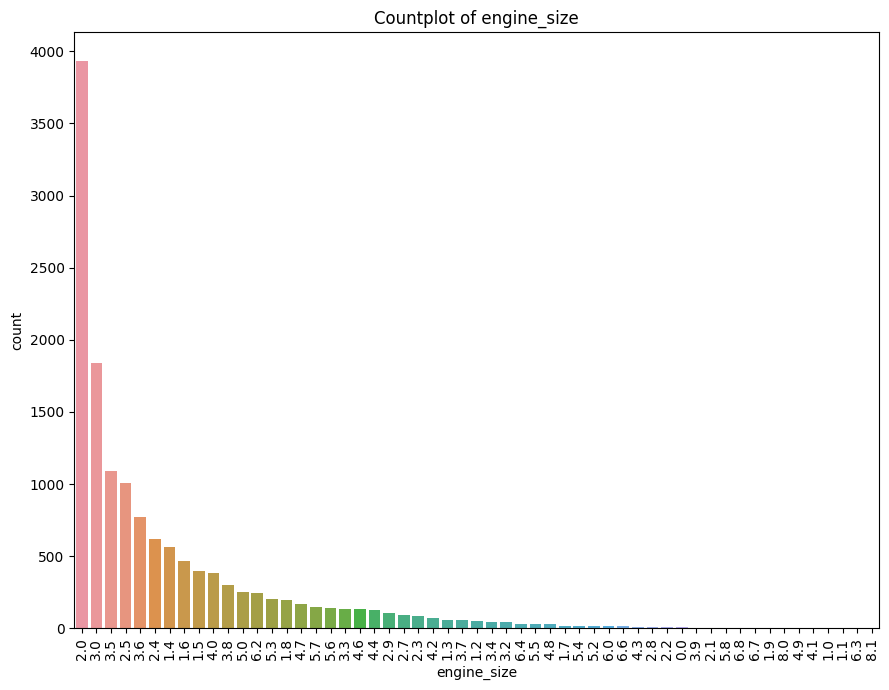

In [96]:
# Daftar fitur kategorikal yang ingin dianalisis
card = ['brand', 'fuel_type', 'drivetrain', 'country', 'engine_size']

# Menghitung frekuensi kemunculan untuk setiap nilai pada fitur kategorikal
counts = df[card].apply(lambda x: x.value_counts().to_dict())

# Mengurutkan kategori berdasarkan jumlah kemunculan tertinggi
sorted_counts = {col: {k: v for k, v in sorted(counts[col].items(), key=lambda item: item[1], reverse=True)} for col in card}

# Menampilkan plot countplot terpisah
for col in card:
    plt.figure(figsize=(9, 7))
    sns.countplot(x=col, data=df, order=list(sorted_counts[col].keys()))
    plt.xticks(rotation=90)
    plt.title(f"Countplot of {col}")
    plt.tight_layout()
    plt.show()

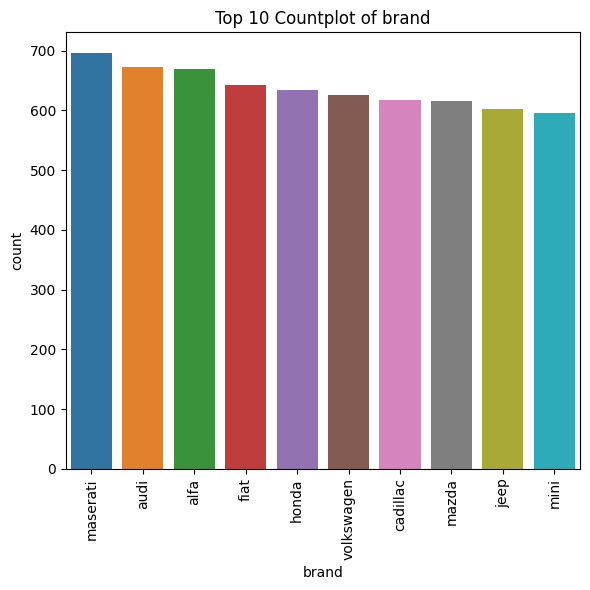

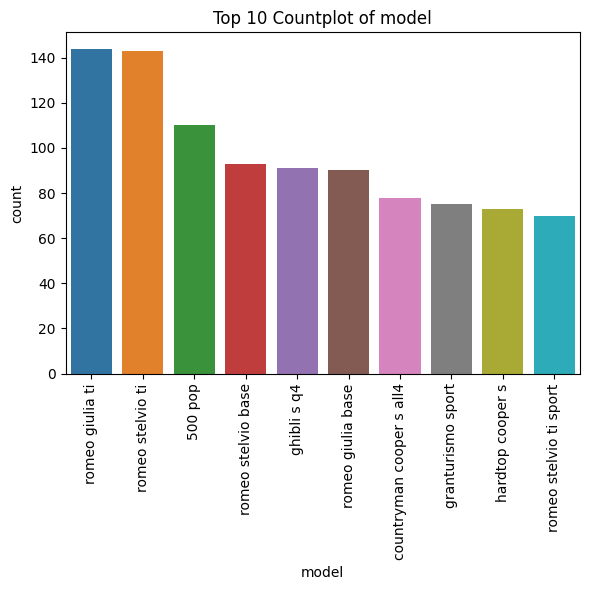

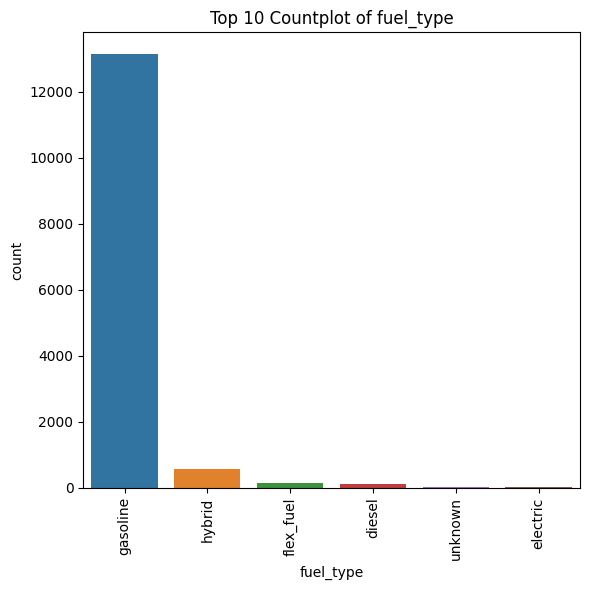

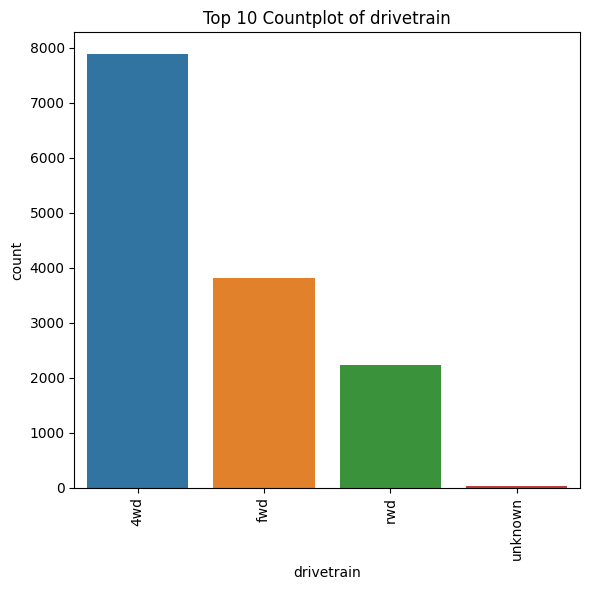

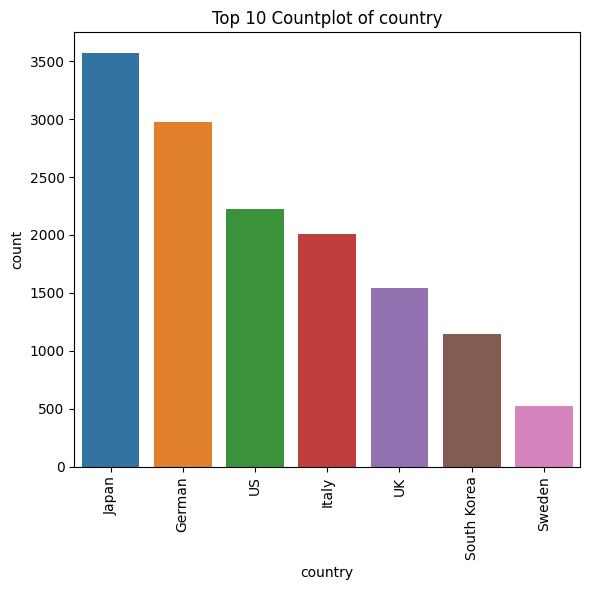

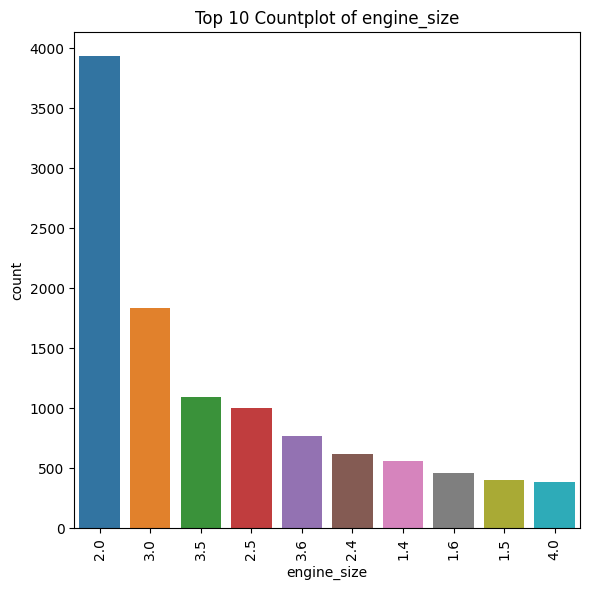

In [97]:
# Daftar fitur kategorikal yang ingin dianalisis
card = ['brand', 'model', 'fuel_type', 'drivetrain', 'country', 'engine_size']

# Menghitung frekuensi kemunculan untuk setiap nilai pada fitur kategorikal
counts = df[card].apply(lambda x: x.value_counts().to_dict())

# Mengurutkan kategori berdasarkan jumlah kemunculan tertinggi
sorted_counts = {col: {k: v for k, v in sorted(counts[col].items(), key=lambda item: item[1], reverse=True)} for col in card}

# Menampilkan plot countplot terpisah untuk 10 nilai teratas
for col in card:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=col, data=df, order=list(sorted_counts[col].keys())[:10])
    plt.xticks(rotation=90)
    plt.title(f"Top 10 Countplot of {col}")
    plt.tight_layout()
    plt.show()

### Multivariate analysis

#### Categorical

* Analisis Drivetrain dan Fuel Type terhadap Harga (Hue: fuel type)

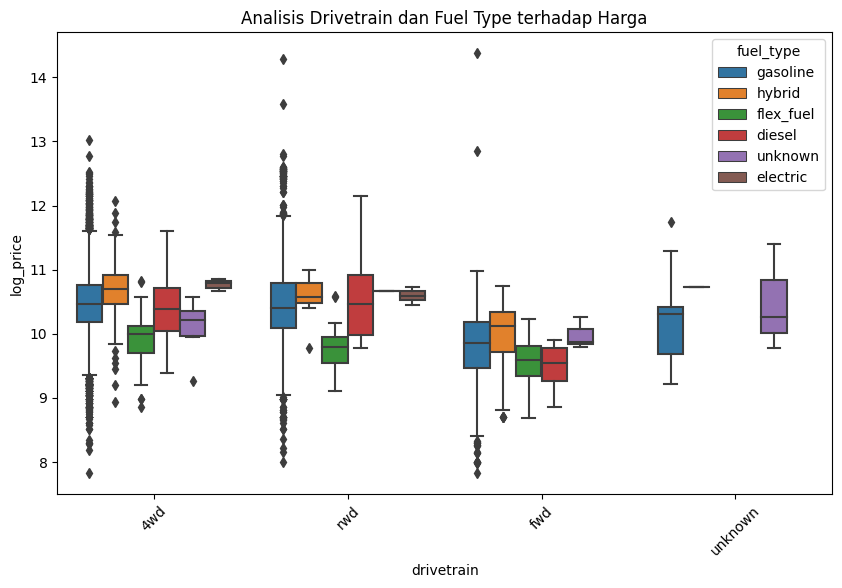

In [98]:
# Analisis kategorikal multivariat: drivetrain dan fuel_type terhadap harga
plt.figure(figsize=(10, 6))
sns.boxplot(x='drivetrain', y='log_price', hue='fuel_type', data=df)
plt.title('Analisis Drivetrain dan Fuel Type terhadap Harga')
plt.xticks(rotation=45)
plt.show()

* Prices of cars over the years (Hue: Automatic transmission)

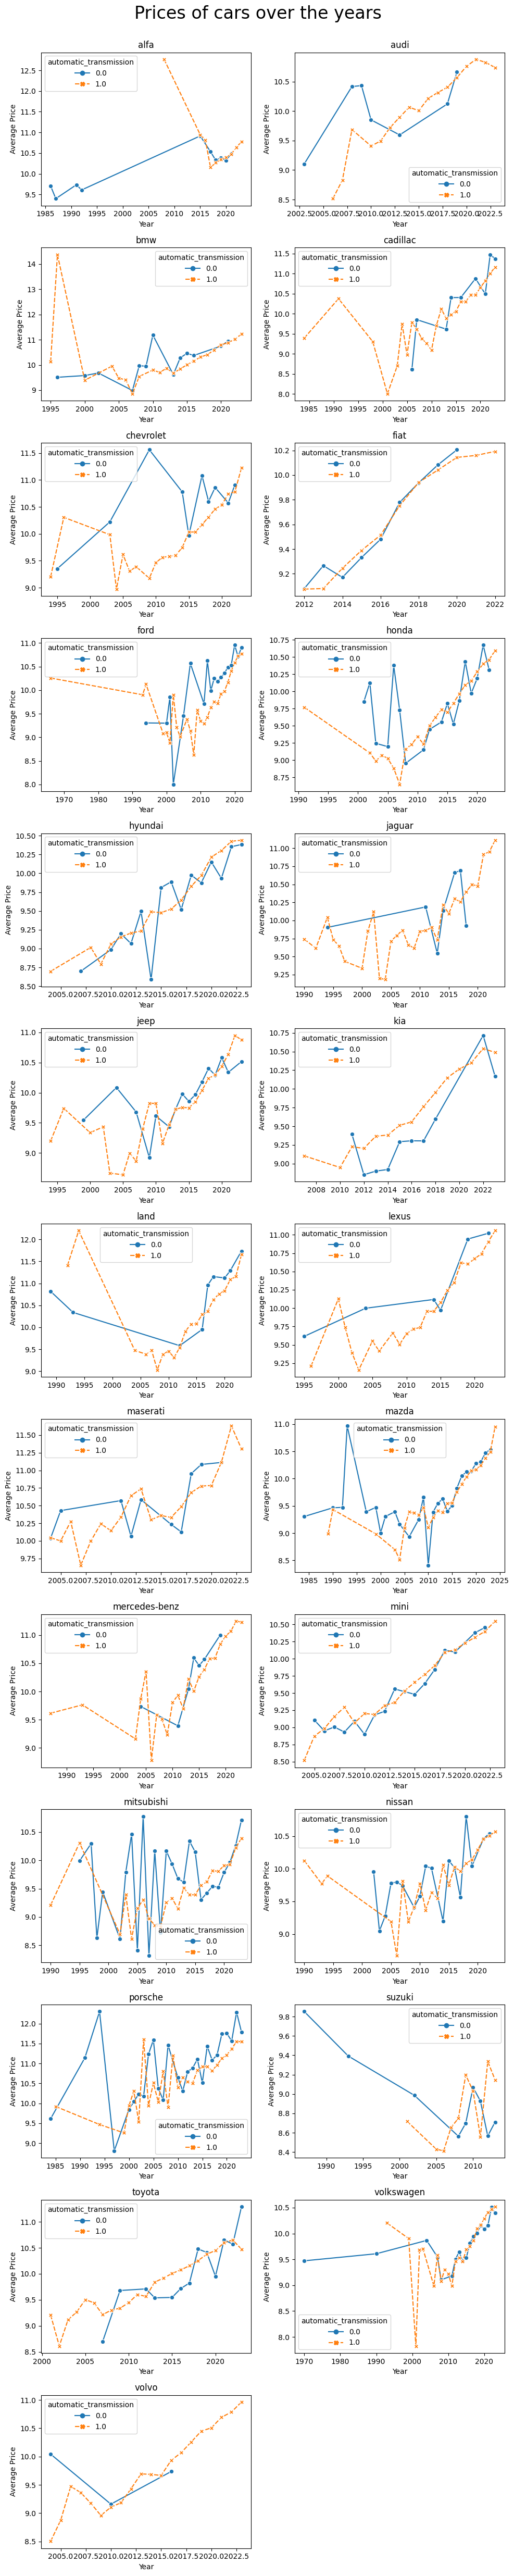

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi dengan DataFrame "df" dan kolom "automatic_transmission" sebagai hue
grouped_df = df.groupby(["brand", "year", "automatic_transmission"]).mean().reset_index()

brands = grouped_df['brand'].unique()
num_rows = len(brands) // 2 + len(brands) % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))
fig.suptitle('Prices of cars over the years', fontsize=24)

for i, brand in enumerate(brands):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    brand_df = grouped_df[grouped_df['brand'] == brand]
    sns.lineplot(data=brand_df, x='year', y='log_price', hue='automatic_transmission', style='automatic_transmission', markers=True, ax=ax)
    ax.set_title(f"{brand}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.979])
fig.delaxes(axes[-1, -1])
plt.show()


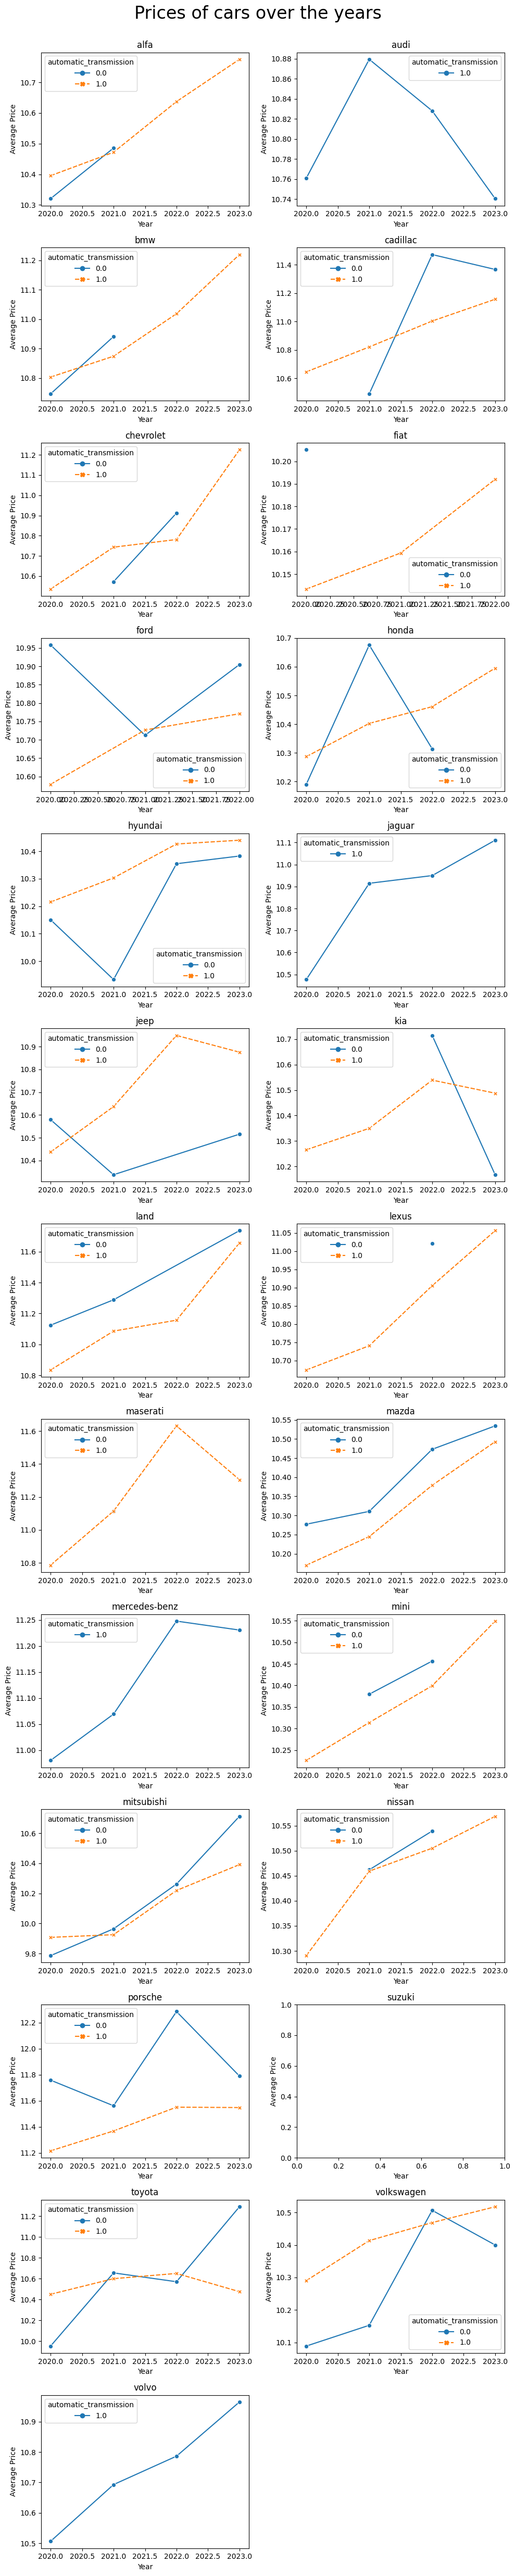

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi dengan DataFrame "df" dan kolom "automatic_transmission" sebagai hue
grouped_df = df.groupby(["brand", "year", "automatic_transmission"]).mean().reset_index()

brands = grouped_df['brand'].unique()
num_rows = len(brands) // 2 + len(brands) % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))
fig.suptitle('Prices of cars over the years', fontsize=24)

for i, brand in enumerate(brands):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    brand_df = grouped_df[grouped_df['brand'] == brand]
    
    # Filter data hanya untuk tahun 2020 - 2023
    brand_df = brand_df[(brand_df['year'] >= 2020) & (brand_df['year'] <= 2023)]
    
    sns.lineplot(data=brand_df, x='year', y='log_price', hue='automatic_transmission', style='automatic_transmission', markers=True, ax=ax)
    ax.set_title(f"{brand}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.979])
fig.delaxes(axes[-1, -1])
plt.show()

* Perbandingan Harga berdasarkan Drivetrain dan Fuel Type (hue: fuel type)

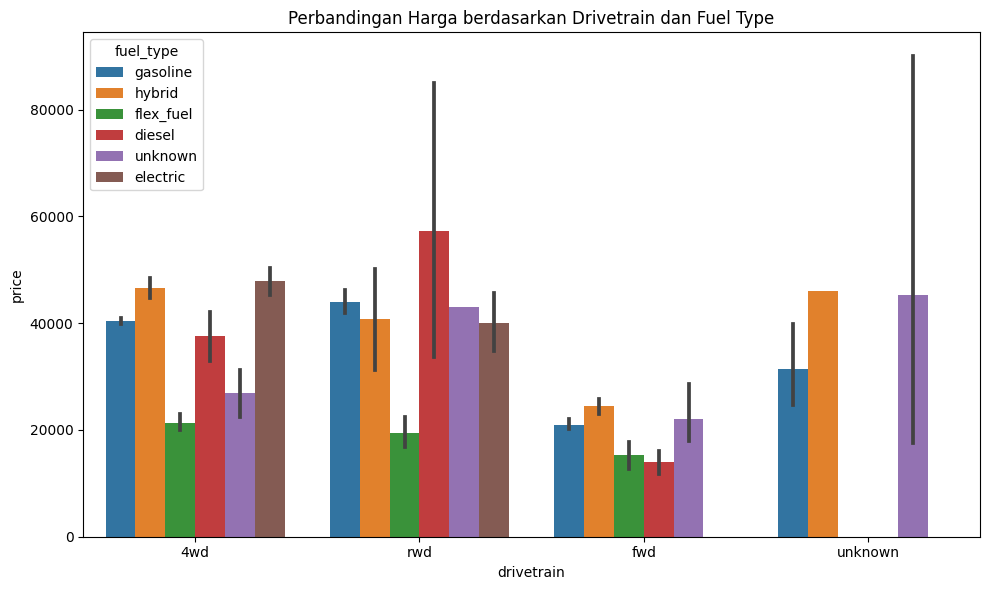

In [101]:
# Membuat bar plot harga berdasarkan kombinasi drivetrain dan fuel_type
plt.figure(figsize=(10, 6))
sns.barplot(x='drivetrain', y='price', hue='fuel_type', data=df)
plt.title('Perbandingan Harga berdasarkan Drivetrain dan Fuel Type')
plt.tight_layout()
plt.show()

## Encoding

In [102]:
df.head(1)

brand                  model    year  mileage                engine  \
0  honda  pilot special edition  2021.0  51299.0  3.5l v6 24v gdi sohc   

   engine_size       transmission  automatic_transmission fuel_type  \
0          3.5  9-speed automatic                     1.0  gasoline   

  drivetrain  ...  bluetooth  usb_port  heated_seats  interior_color  \
0        4wd  ...        1.0       0.0           1.0           black   

          exterior_color    price  country  ex_color  in_color  log_price  
0  modern steel metallic  35999.0    Japan  metallic     black  10.491246  

[1 rows x 40 columns]

In [103]:
df.shape

(13987, 40)

* One-Hot Encoding

In [104]:
df.fuel_type.value_counts()

gasoline     13136
hybrid         564
flex_fuel      140
diesel         119
unknown         19
electric         9
Name: fuel_type, dtype: int64

In [105]:
df.drivetrain.value_counts()

4wd        7888
fwd        3822
rwd        2239
unknown      38
Name: drivetrain, dtype: int64

In [106]:
# Melakukan one-hot encoding pada kolom "drivetrain" dan "fuel_type"
df_encoded = pd.get_dummies(df, columns=['drivetrain', 'fuel_type', 'brand', 'country', 'ex_color', 'in_color'])
df_encoded.head(3)

model    year  mileage                           engine  \
0   pilot special edition  2021.0  51299.0             3.5l v6 24v gdi sohc   
1  gl-class gl 450 4matic  2014.0  79279.0  4.7l v8 32v gdi dohc twin turbo   
2      outlander sport se  2021.0  31976.0            2.0l i4 16v mpfi dohc   

   engine_size       transmission  automatic_transmission  min_mpg  max_mpg  \
0          3.5  9-speed automatic                     1.0     19.0     26.0   
1          4.7  7-speed automatic                     1.0     21.0     28.0   
2          2.0      automatic cvt                     1.0     24.0     31.0   

   damaged  ...  in_color_black  in_color_blue  in_color_brown  in_color_gray  \
0      0.0  ...               1              0               0              0   
1      0.0  ...               1              0               0              0   
2      0.0  ...               0              0               0              1   

   in_color_green  in_color_other  in_color_red  in_color_silver  \
0               0               0             0                0   
1               0               0             0                0   
2               0               0             0                0   

   in_color_white  in_color_yellow  
0               0                0  
1               0                0  
2               0                0  

[3 rows x 97 columns]

In [107]:
df_encoded.columns

Index(['model', 'year', 'mileage', 'engine', 'engine_size', 'transmission',
       'automatic_transmission', 'min_mpg', 'max_mpg', 'damaged',
       'first_owner', 'personal_using', 'turbo', 'alloy_wheels',
       'adaptive_cruise_control', 'navigation_system', 'power_liftgate',
       'backup_camera', 'keyless_start', 'remote_start', 'sunroof/moonroof',
       'automatic_emergency_braking', 'stability_control', 'leather_seats',
       'memory_seat', 'third_row_seating', 'apple_car_play/android_auto',
       'bluetooth', 'usb_port', 'heated_seats', 'interior_color',
       'exterior_color', 'price', 'log_price', 'drivetrain_4wd',
       'drivetrain_fwd', 'drivetrain_rwd', 'drivetrain_unknown',
       'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_flex_fuel',
       'fuel_type_gasoline', 'fuel_type_hybrid', 'fuel_type_unknown',
       'brand_alfa', 'brand_audi', 'brand_bmw', 'brand_cadillac',
       'brand_chevrolet', 'brand_fiat', 'brand_ford', 'brand_honda',
       'brand_hyunda

In [110]:
df_encoded.shape

(13987, 97)

In [111]:
df_encoded.columns

Index(['model', 'year', 'mileage', 'engine', 'engine_size', 'transmission',
       'automatic_transmission', 'min_mpg', 'max_mpg', 'damaged',
       'first_owner', 'personal_using', 'turbo', 'alloy_wheels',
       'adaptive_cruise_control', 'navigation_system', 'power_liftgate',
       'backup_camera', 'keyless_start', 'remote_start', 'sunroof/moonroof',
       'automatic_emergency_braking', 'stability_control', 'leather_seats',
       'memory_seat', 'third_row_seating', 'apple_car_play/android_auto',
       'bluetooth', 'usb_port', 'heated_seats', 'interior_color',
       'exterior_color', 'price', 'log_price', 'drivetrain_4wd',
       'drivetrain_fwd', 'drivetrain_rwd', 'drivetrain_unknown',
       'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_flex_fuel',
       'fuel_type_gasoline', 'fuel_type_hybrid', 'fuel_type_unknown',
       'brand_alfa', 'brand_audi', 'brand_bmw', 'brand_cadillac',
       'brand_chevrolet', 'brand_fiat', 'brand_ford', 'brand_honda',
       'brand_hyunda

In [112]:
df_encoded.describe().T

count          mean           std     min      25%  \
year                    13987.0   2017.819189      4.307033  1966.0   2016.0   
mileage                 13987.0  49049.174376  37205.102425     0.0  20994.5   
engine_size             13987.0      2.853707      1.150212     0.0      2.0   
automatic_transmission  13987.0      0.923071      0.266488     0.0      1.0   
min_mpg                 13987.0     20.833345      5.848195     0.0     17.0   
...                         ...           ...           ...     ...      ...   
in_color_other          13987.0      0.268821      0.443363     0.0      0.0   
in_color_red            13987.0      0.028884      0.167486     0.0      0.0   
in_color_silver         13987.0      0.000786      0.028034     0.0      0.0   
in_color_white          13987.0      0.005219      0.072057     0.0      0.0   
in_color_yellow         13987.0      0.000143      0.011957     0.0      0.0   

                            50%      75%       max  
year                     2019.0   2021.0    2024.0  
mileage                 40873.0  69674.0  361662.0  
engine_size                 2.5      3.5       8.1  
automatic_transmission      1.0      1.0       1.0  
min_mpg                    20.0     24.0      80.0  
...                         ...      ...       ...  
in_color_other              0.0      1.0       1.0  
in_color_red                0.0      0.0       1.0  
in_color_silver             0.0      0.0       1.0  
in_color_white              0.0      0.0       1.0  
in_color_yellow             0.0      0.0       1.0  

[92 rows x 8 columns]

In [113]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13987 entries, 0 to 13986
Data columns (total 97 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   model                        13987 non-null  object 
 1   year                         13987 non-null  float64
 2   mileage                      13987 non-null  float64
 3   engine                       13987 non-null  object 
 4   engine_size                  13987 non-null  float64
 5   transmission                 13987 non-null  object 
 6   automatic_transmission       13987 non-null  float64
 7   min_mpg                      13987 non-null  float64
 8   max_mpg                      13987 non-null  float64
 9   damaged                      13987 non-null  float64
 10  first_owner                  13987 non-null  float64
 11  personal_using               13987 non-null  float64
 12  turbo                        13987 non-null  float64
 13  alloy_wheels    

### Correlation matrix

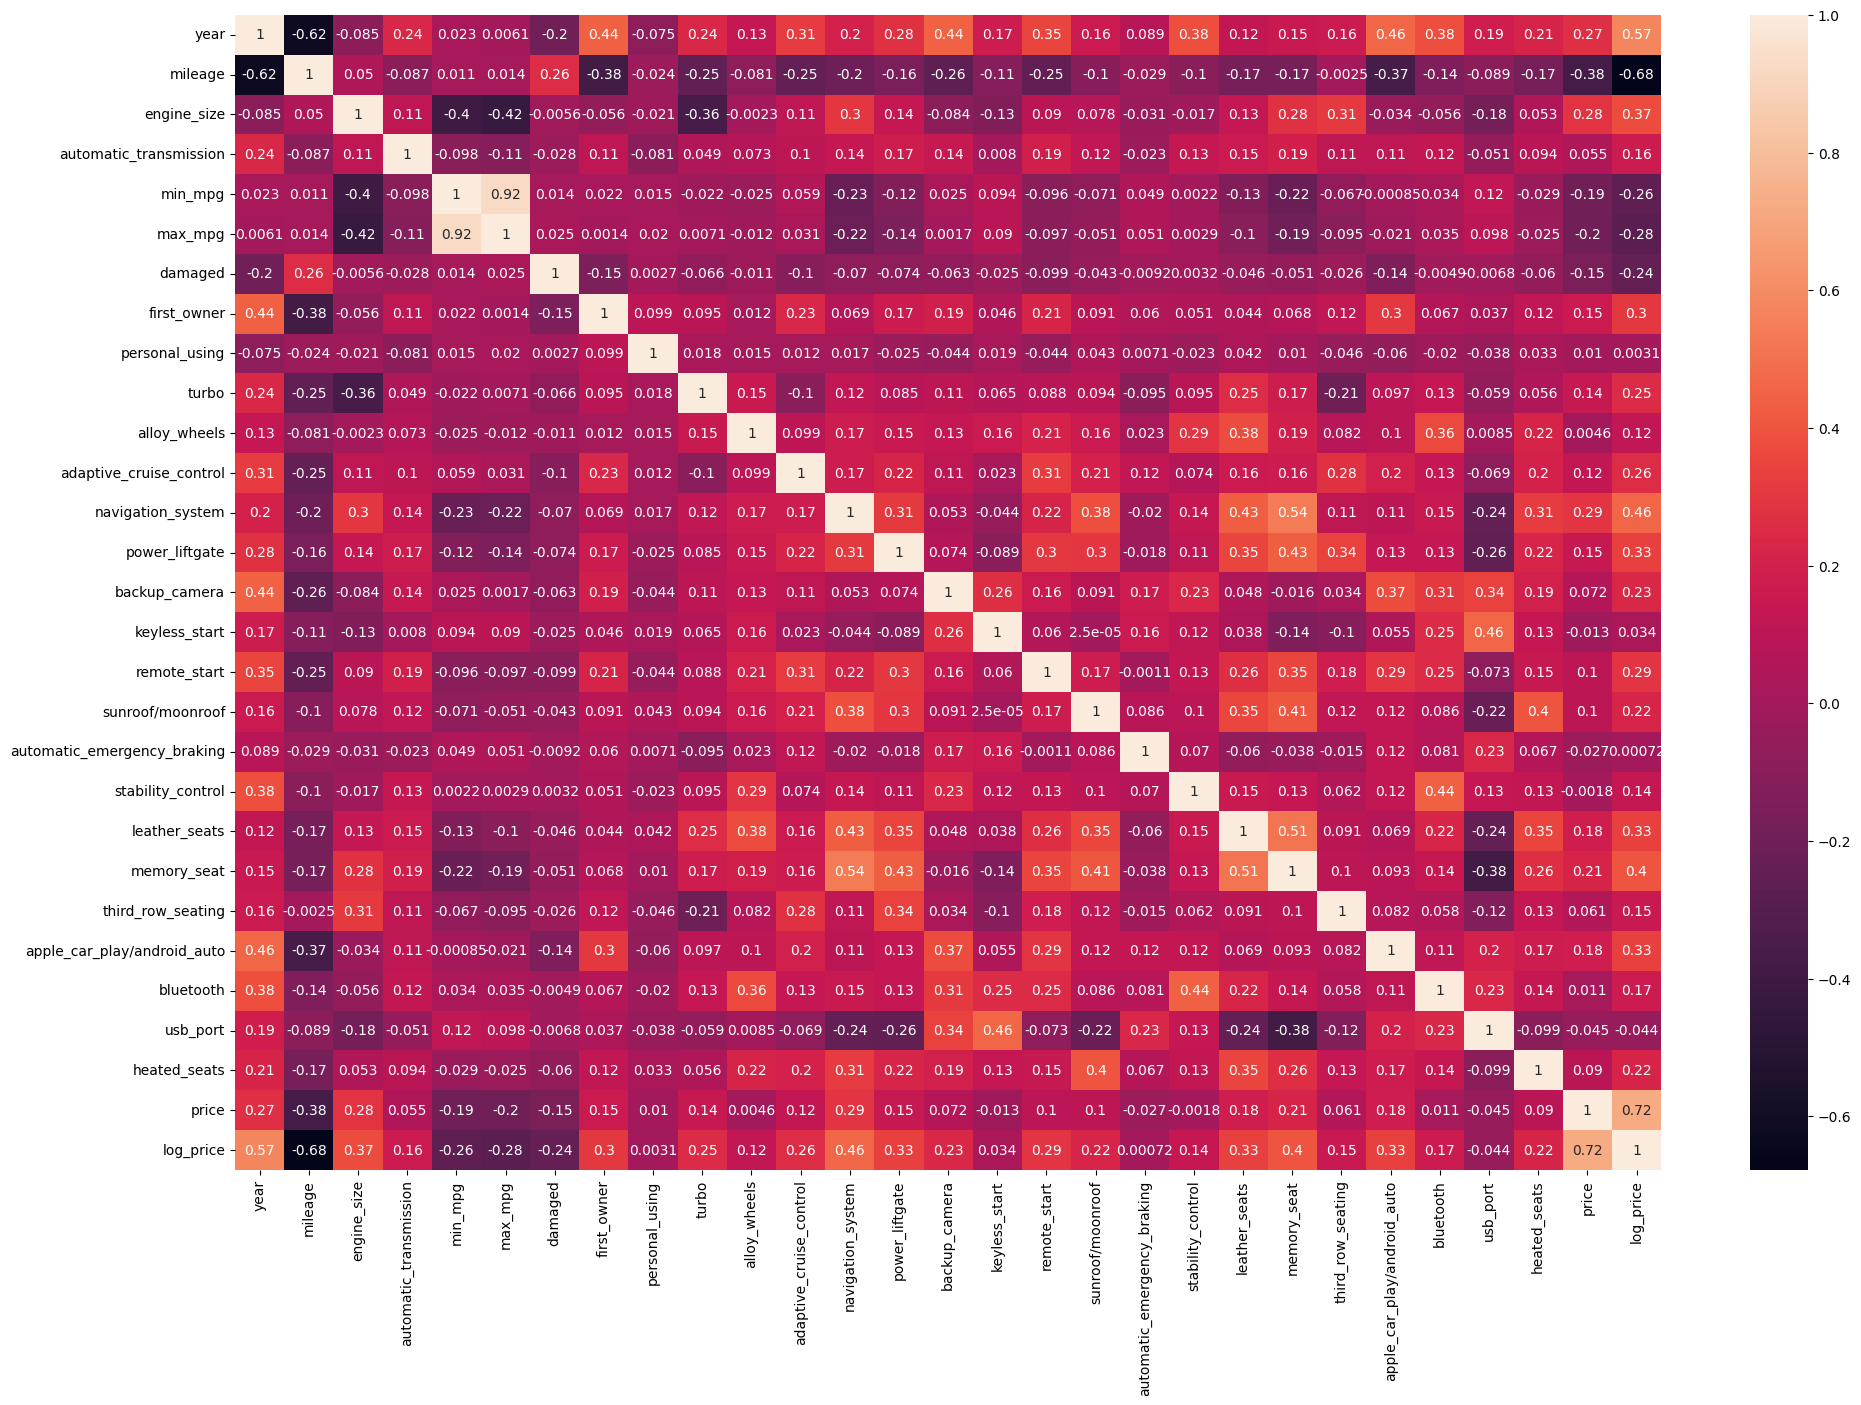

In [114]:
plt.figure(figsize=(23,15))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [115]:
results = df.corr()[ (df.corr() > 0.3) & (df.corr() != 1) ]
results

year  mileage  engine_size  \
year                              NaN      NaN          NaN   
mileage                           NaN      NaN          NaN   
engine_size                       NaN      NaN          NaN   
automatic_transmission            NaN      NaN          NaN   
min_mpg                           NaN      NaN          NaN   
max_mpg                           NaN      NaN          NaN   
damaged                           NaN      NaN          NaN   
first_owner                  0.439326      NaN          NaN   
personal_using                    NaN      NaN          NaN   
turbo                             NaN      NaN          NaN   
alloy_wheels                      NaN      NaN          NaN   
adaptive_cruise_control      0.313505      NaN          NaN   
navigation_system                 NaN      NaN          NaN   
power_liftgate                    NaN      NaN          NaN   
backup_camera                0.444538      NaN          NaN   
keyless_start                     NaN      NaN          NaN   
remote_start                 0.348529      NaN          NaN   
sunroof/moonroof                  NaN      NaN          NaN   
automatic_emergency_braking       NaN      NaN          NaN   
stability_control            0.381274      NaN          NaN   
leather_seats                     NaN      NaN          NaN   
memory_seat                       NaN      NaN          NaN   
third_row_seating                 NaN      NaN     0.310386   
apple_car_play/android_auto  0.456906      NaN          NaN   
bluetooth                    0.380053      NaN          NaN   
usb_port                          NaN      NaN          NaN   
heated_seats                      NaN      NaN          NaN   
price                             NaN      NaN          NaN   
log_price                    0.574860      NaN     0.372211   

                             automatic_transmission  min_mpg  max_mpg  \
year                                            NaN      NaN      NaN   
mileage                                         NaN      NaN      NaN   
engine_size                                     NaN      NaN      NaN   
automatic_transmission                          NaN      NaN      NaN   
min_mpg                                         NaN      NaN  0.92187   
max_mpg                                         NaN  0.92187      NaN   
damaged                                         NaN      NaN      NaN   
first_owner                                     NaN      NaN      NaN   
personal_using                                  NaN      NaN      NaN   
turbo                                           NaN      NaN      NaN   
alloy_wheels                                    NaN      NaN      NaN   
adaptive_cruise_control                         NaN      NaN      NaN   
navigation_system                               NaN      NaN      NaN   
power_liftgate                                  NaN      NaN      NaN   
backup_camera                                   NaN      NaN      NaN   
keyless_start                                   NaN      NaN      NaN   
remote_start                                    NaN      NaN      NaN   
sunroof/moonroof                                NaN      NaN      NaN   
automatic_emergency_braking                     NaN      NaN      NaN   
stability_control                               NaN      NaN      NaN   
leather_seats                                   NaN      NaN      NaN   
memory_seat                                     NaN      NaN      NaN   
third_row_seating                               NaN      NaN      NaN   
apple_car_play/android_auto                     NaN      NaN      NaN   
bluetooth                                       NaN      NaN      NaN   
usb_port                                        NaN      NaN      NaN   
heated_seats                                    NaN      NaN      NaN   
price                                           NaN      NaN      NaN   
log_price                

#### Backup Dataframe

In [116]:
# Reset index pada DataFrame df
df_encoded.reset_index(drop=True, inplace=True)

In [117]:
df1 = df_encoded.copy()
df1.head(3)

model    year  mileage                           engine  \
0   pilot special edition  2021.0  51299.0             3.5l v6 24v gdi sohc   
1  gl-class gl 450 4matic  2014.0  79279.0  4.7l v8 32v gdi dohc twin turbo   
2      outlander sport se  2021.0  31976.0            2.0l i4 16v mpfi dohc   

   engine_size       transmission  automatic_transmission  min_mpg  max_mpg  \
0          3.5  9-speed automatic                     1.0     19.0     26.0   
1          4.7  7-speed automatic                     1.0     21.0     28.0   
2          2.0      automatic cvt                     1.0     24.0     31.0   

   damaged  ...  in_color_black  in_color_blue  in_color_brown  in_color_gray  \
0      0.0  ...               1              0               0              0   
1      0.0  ...               1              0               0              0   
2      0.0  ...               0              0               0              1   

   in_color_green  in_color_other  in_color_red  in_color_silver  \
0               0               0             0                0   
1               0               0             0                0   
2               0               0             0                0   

   in_color_white  in_color_yellow  
0               0                0  
1               0                0  
2               0                0  

[3 rows x 97 columns]

* Run this check point

In [118]:
df_encoded = df1
df_encoded.head(3)

model    year  mileage                           engine  \
0   pilot special edition  2021.0  51299.0             3.5l v6 24v gdi sohc   
1  gl-class gl 450 4matic  2014.0  79279.0  4.7l v8 32v gdi dohc twin turbo   
2      outlander sport se  2021.0  31976.0            2.0l i4 16v mpfi dohc   

   engine_size       transmission  automatic_transmission  min_mpg  max_mpg  \
0          3.5  9-speed automatic                     1.0     19.0     26.0   
1          4.7  7-speed automatic                     1.0     21.0     28.0   
2          2.0      automatic cvt                     1.0     24.0     31.0   

   damaged  ...  in_color_black  in_color_blue  in_color_brown  in_color_gray  \
0      0.0  ...               1              0               0              0   
1      0.0  ...               1              0               0              0   
2      0.0  ...               0              0               0              1   

   in_color_green  in_color_other  in_color_red  in_color_silver  \
0               0               0             0                0   
1               0               0             0                0   
2               0               0             0                0   

   in_color_white  in_color_yellow  
0               0                0  
1               0                0  
2               0                0  

[3 rows x 97 columns]

## Modeling

### Filltering Features

In [119]:
numericals = df_encoded.select_dtypes(include=['int64','float64', 'uint8', 'int32']).columns.tolist()
numericals

['year',
 'mileage',
 'engine_size',
 'automatic_transmission',
 'min_mpg',
 'max_mpg',
 'damaged',
 'first_owner',
 'personal_using',
 'turbo',
 'alloy_wheels',
 'adaptive_cruise_control',
 'navigation_system',
 'power_liftgate',
 'backup_camera',
 'keyless_start',
 'remote_start',
 'sunroof/moonroof',
 'automatic_emergency_braking',
 'stability_control',
 'leather_seats',
 'memory_seat',
 'third_row_seating',
 'apple_car_play/android_auto',
 'bluetooth',
 'usb_port',
 'heated_seats',
 'price',
 'log_price',
 'drivetrain_4wd',
 'drivetrain_fwd',
 'drivetrain_rwd',
 'drivetrain_unknown',
 'fuel_type_diesel',
 'fuel_type_electric',
 'fuel_type_flex_fuel',
 'fuel_type_gasoline',
 'fuel_type_hybrid',
 'fuel_type_unknown',
 'brand_alfa',
 'brand_audi',
 'brand_bmw',
 'brand_cadillac',
 'brand_chevrolet',
 'brand_fiat',
 'brand_ford',
 'brand_honda',
 'brand_hyundai',
 'brand_jaguar',
 'brand_jeep',
 'brand_kia',
 'brand_land',
 'brand_lexus',
 'brand_maserati',
 'brand_mazda',
 'brand_merc

#### What people often consider when choosing a used car:

Numerik:

* 'year': Tahun pembuatan kendaraan.
* 'mileage': Jumlah mil atau jarak yang telah ditempuh kendaraan.
* 'engine_size': Ukuran mesin kendaraan.
* 'min_mpg': Konsumsi bahan bakar terendah dalam mil per galon.
* 'max_mpg': Konsumsi bahan bakar tertinggi dalam mil per galon.

Kategorikal:

* 'model': Model kendaraan.
* 'engine': Jenis mesin kendaraan.
* 'transmission': Jenis transmisi kendaraan.
* 'interior_color': Warna interior kendaraan.
* 'exterior_color': Warna eksterior kendaraan.
* 'fuel_type_gasoline', 'fuel_type_diesel', dll.: Jenis bahan bakar kendaraan.
* 'brand_audi', 'brand_bmw', dll.: Merek kendaraan.
* 'country_Amerika Serikat', 'country_Jepang', dll.: Negara asal kendaraan.

Fitur-fitur lain yang relevan:

* 'automatic_transmission': Apakah kendaraan memiliki transmisi otomatis?
* 'damaged': Apakah kendaraan pernah mengalami kerusakan?

References: 
* https://carro.sg/blog/5-checks-buy-used-car/
* https://www.acko.com/articles/car-insurance/5-things-to-consider-before-buying-a-used-car/
* https://www.allstate.com/resources/car-insurance/what-to-look-for-buying-used-car


In [120]:
#Split the labeled data frame into two sets: features and target
X=df_encoded[['year', 'mileage', 'engine_size', 'automatic_transmission', 'min_mpg', 'max_mpg', 'damaged', 'first_owner',
 'personal_using', 'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system', 'power_liftgate', 'backup_camera',
 'keyless_start', 'remote_start', 'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control', 'leather_seats',
 'memory_seat', 'third_row_seating', 'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats',
 
 'drivetrain_4wd', 'drivetrain_fwd', 'drivetrain_rwd', 'drivetrain_unknown',
 
 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_flex_fuel', 'fuel_type_gasoline', 'fuel_type_hybrid', 'fuel_type_unknown',
 
 'brand_alfa', 'brand_audi', 'brand_bmw', 'brand_cadillac', 'brand_chevrolet', 'brand_fiat', 'brand_ford', 'brand_honda',
 'brand_hyundai', 'brand_jaguar', 'brand_jeep', 'brand_kia', 'brand_land', 'brand_lexus', 'brand_maserati', 'brand_mazda',
 'brand_mercedes-benz', 'brand_mini', 'brand_mitsubishi', 'brand_nissan', 'brand_porsche', 'brand_suzuki', 'brand_toyota',
 'brand_volkswagen', 'brand_volvo', 
 
 'country_Italy', 'country_Japan', 'country_South Korea', 'country_Sweden', 'country_UK', 'country_US',
  
 'ex_color_black', 'ex_color_blue', 'ex_color_brown', 'ex_color_gray', 'ex_color_green', 'ex_color_metallic', 'ex_color_other',
 'ex_color_red', 'ex_color_silver', 'ex_color_white', 'ex_color_yellow',
 
 'in_color_black', 'in_color_blue', 'in_color_brown', 'in_color_gray', 'in_color_green', 'in_color_other', 'in_color_red',
 'in_color_silver', 'in_color_white', 'in_color_yellow'

]]

y = df_encoded['log_price'].reset_index(drop = True)

print(X.shape, y.shape)

(13987, 89) (13987,)


In [121]:
#Split the labeled data frame into two sets to train then test the models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11189, 89), (11189,), (2798, 89), (2798,))

In [122]:
X.head()

year  mileage  engine_size  automatic_transmission  min_mpg  max_mpg  \
0  2021.0  51299.0          3.5                     1.0     19.0     26.0   
1  2014.0  79279.0          4.7                     1.0     21.0     28.0   
2  2021.0  31976.0          2.0                     1.0     24.0     31.0   
3  1994.0  92025.0          3.0                     1.0     10.0     16.0   
4  2016.0  43418.0          1.5                     1.0     21.0     31.0   

   damaged  first_owner  personal_using  turbo  ...  in_color_black  \
0      0.0          1.0             1.0    0.0  ...               1   
1      0.0          0.0             1.0    1.0  ...               1   
2      0.0          1.0             0.0    0.0  ...               0   
3      1.0          0.0             0.0    0.0  ...               0   
4      0.0          0.0             0.0    1.0  ...               1   

   in_color_blue  in_color_brown  in_color_gray  in_color_green  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              1               0   
3              0               0              0               0   
4              0               0              0               0   

   in_color_other  in_color_red  in_color_silver  in_color_white  \
0               0             0                0               0   
1               0             0                0               0   
2               0             0                0               0   
3               1             0                0               0   
4               0             0                0               0   

   in_color_yellow  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 89 columns]

In [123]:
y.head()

0    10.491246
1    10.014537
2     9.878118
3     9.469623
4     9.711116
Name: log_price, dtype: float64

### ML Model

#### LinearRegression

In [124]:
lr =  LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)

In [125]:
print('R2 for training data is {}'.format(r2_score(y_train, lr_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, lr_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, lr_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, lr_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, lr_pred))
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('MAE for test data: ', mean_absolute_error(y_test,lr_pred))
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, lr_pred))

R2 for training data is 0.8402522952146436
RMSE for training data is 0.24411388132802775
MAE for training data is 0.16392774506366364
MAPE for training data is 0.015918247664565156
--------------------------------------------------------------------------------
R2 for test data:  0.8465506943787963
RMSE for test data:  0.23712205808016087
MAE for test data:  0.16712137832752225
MAPE for test data:  0.016314405933282605


#### GradientBoosting

In [126]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_pred_train = gb.predict(X_train)

In [127]:
print('R2 for training data is {}'.format(r2_score(y_train, gb_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, gb_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, gb_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, gb_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, gb_pred))
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, gb_pred)))
print('MAE for test data: ', mean_absolute_error(y_test,gb_pred))
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, gb_pred))

R2 for training data is 0.9049230154566908
RMSE for training data is 0.18832711870004978
MAE for training data is 0.1371271170249971
MAPE for training data is 0.01335954167612984
--------------------------------------------------------------------------------
R2 for test data:  0.8896932003732172
RMSE for test data:  0.20104377674527632
MAE for test data:  0.147797113989978
MAPE for test data:  0.014494298825046452


#### XGBoost

In [128]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_pred_train = xgb.predict(X_train)

In [129]:
print('R2 for training data is {}'.format(r2_score(y_train, xgb_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, xgb_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, xgb_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, xgb_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, xgb_pred))
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, xgb_pred)))
print('MAE for test data: ', mean_absolute_error(y_test,xgb_pred))
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, xgb_pred))

R2 for training data is 0.9754036129599051
RMSE for training data is 0.09578793736602136
MAE for training data is 0.07314400484486304
MAPE for training data is 0.007153449598177945
--------------------------------------------------------------------------------
R2 for test data:  0.9223198852542777
RMSE for test data:  0.16871139684697778
MAE for test data:  0.11794240475010893
MAPE for test data:  0.011620086247499096


#### LGBM

In [130]:
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
lgbm_pred_train = lgbm.predict(X_train)

In [131]:
# Print metrics for training data
print('R2 for training data is {}'.format(r2_score(y_train, lgbm_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, lgbm_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, lgbm_pred_train)))
print('-'*80)

# Print metrics for test data
print('R2 for test data: ', r2_score(y_test, lgbm_pred))
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, lgbm_pred)))
print('MAE for test data: ', mean_absolute_error(y_test, lgbm_pred))


R2 for training data is 0.9433764714903565
RMSE for training data is 0.14533614179881515
MAE for training data is 0.10389272605469312
--------------------------------------------------------------------------------
R2 for test data:  0.9179020384608724
RMSE for test data:  0.1734425615388894
MAE for test data:  0.12421695821930567


#### KNN

In [132]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)
kn_pred_train = kn.predict(X_train)

In [133]:
print('R2 for training data is {}'.format(r2_score(y_train, kn_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, kn_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, kn_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, kn_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, kn_pred))
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, kn_pred)))
print('MAE for test data: ', mean_absolute_error(y_test,kn_pred))
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, kn_pred))

R2 for training data is 0.602996574597044
RMSE for training data is 0.38483298493063894
MAE for training data is 0.29909855969255106
MAPE for training data is 0.029122201089219972
--------------------------------------------------------------------------------
R2 for test data:  0.39890926891759027
RMSE for test data:  0.46930967508857563
MAE for test data:  0.37204120657407835
MAPE for test data:  0.03641971090005397


#### Best Model

In [134]:
# Define the pipelines for various models
pipeline_lr = Pipeline([('lr', LinearRegression())])
pipeline_gb = Pipeline([('gb', GradientBoostingRegressor())])
pipeline_xgb = Pipeline([('xgb', XGBRegressor())])
pipeline_lgbm = Pipeline([('lgbm', LGBMRegressor())])
pipeline_knn = Pipeline([('knn', KNeighborsRegressor())])

pipelines = [pipeline_lr, pipeline_gb, pipeline_xgb, pipeline_lgbm, pipeline_knn]

pipe_dict = {
    0: 'Linear Regression',
    1: 'Gradient Boost',
    2: 'XGBoost',
    3: 'LGBM',
    4: 'K-Neighbors Regression'
}

test_score = []
train_score = []
model_list = []

for i, model in enumerate(pipelines):
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))
    model_list.append(pipe_dict[i])

for i in range(len(model_list)):
    print(f"Model: {model_list[i]}")
    print(f"Training R2 Score: {train_score[i]}")
    print(f"Test R2 Score: {test_score[i]}")
    print("-" * 40)

Model: Linear Regression
Training R2 Score: 0.8402522952146436
Test R2 Score: 0.8465506943787963
----------------------------------------
Model: Gradient Boost
Training R2 Score: 0.904923015456691
Test R2 Score: 0.8897800811159198
----------------------------------------
Model: XGBoost
Training R2 Score: 0.9754036129599051
Test R2 Score: 0.9223198852542777
----------------------------------------
Model: LGBM
Training R2 Score: 0.9433764714903565
Test R2 Score: 0.9179020384608724
----------------------------------------
Model: K-Neighbors Regression
Training R2 Score: 0.602996574597044
Test R2 Score: 0.39890926891759027
----------------------------------------


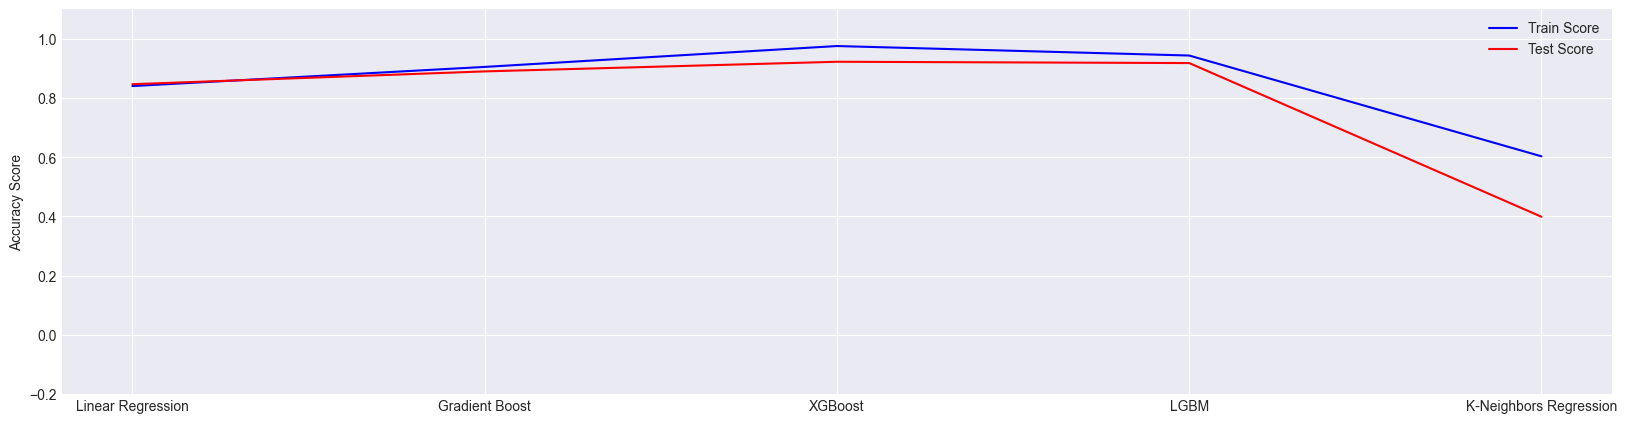

In [135]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5))
plt.plot(model_list, train_score, color='blue', label='Train Score')
plt.plot(model_list, test_score, color='red', label='Test Score')
plt.ylim(-0.2, 1.1)
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

In [136]:
for i, model in enumerate(pipelines):
    print(f'{pipe_dict[i]} has train accuracy: {round(model.score(X_train, y_train),3)}')
    print(f'{pipe_dict[i]} has test accuracy: {round(model.score(X_test, y_test),3)}')
    print('')

Linear Regression has train accuracy: 0.84
Linear Regression has test accuracy: 0.847

Gradient Boost has train accuracy: 0.905
Gradient Boost has test accuracy: 0.89

XGBoost has train accuracy: 0.975
XGBoost has test accuracy: 0.922

LGBM has train accuracy: 0.943
LGBM has test accuracy: 0.918

K-Neighbors Regression has train accuracy: 0.603
K-Neighbors Regression has test accuracy: 0.399



* Observations:

Berdasarkan hasil model, model dengan regressor *XGBoost* memiliki nilai R2 score tertinggi baik pada data train maupun data test, yaitu 0.975 dan 0.922. 

Namun, faktor waktu pelatihan yang lebih cepat juga menjadi pertimbangan. Dalam hal ini, LightGBM (LGBM) adalah pilihan yang baik. Meskipun nilai R2 score LGBM (0.943 pada data train dan 0.918 pada data test) tidak sebaik XGBoost, namun performa yang lebih baik dalam hal waktu pelatihan dapat menjadi faktor penting terutama untuk mengurangi waktu pemrosesan. sehingga dakan dicoba untuk dilakukannya hyper parameter tuning untuk model XGBoost, Random Forest, dan LGBM Regressor.

### Hyperparameter Tuning

#### Metrics

In [137]:
from sklearn.metrics import mean_squared_error as MSE
from matplotlib import legend

# Function for evaluation metric for regression
def EvaluationMetric(Xt, yt, yp, disp="on"):
  
    ''' Take the different set of parameter and prints evaluation metrics '''
    mse = round(mean_squared_error(y_true=yt, y_pred=yp), 4)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=yt, y_pred=yp)
    adjusted_r2 = 1 - (1 - r2) * ((Xt.shape[0] - 1) / (Xt.shape[0] - Xt.shape[1] - 1))
    mae = np.mean(np.abs(yt - yp))
    
    if disp == "on":
        print("MSE:", mse, "RMSE:", rmse)
        print("R2:", r2, "Adjusted R2:", adjusted_r2)
        print("MAE:", mae)
    
    # Plotting Actual and Predicted Values
    plt.figure(figsize=(18, 6))
    plt.plot(yp[:100])
    plt.plot(np.array(yt)[:100])
    plt.legend(["Predicted", "Actual"])
    plt.title('Actual and Predicted Time Duration')
    
    return mse, rmse, r2, adjusted_r2, mae

#### XGBoost

In [138]:
%%time
xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(estimator=xgb_model, 
                           param_grid = {'n_estimators': [100, 200, 300],
                                         'max_depth': [3, 5, 7],
                                         'learning_rate': [0.01, 0.1, 0.2]},
                           scoring='r2', cv=5)

xgb_grid.fit(X_train, y_train)

print("Best Parameters:", xgb_grid.best_params_)
print("Best R2 Score:", xgb_grid.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best R2 Score: 0.9236463747638096
CPU times: total: 34min 58s
Wall time: 16min 15s


In [139]:
cv_xgb_result = pd.DataFrame(xgb_grid.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_xgb_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  \
17  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.923646   
16  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.922056   
26  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.921205   
25  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.920979   
23  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...         0.920952   
22  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...         0.919302   
14  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...         0.918639   
24  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.918618   
15  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.915039   
13  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...         0.914890   
21  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...         0.913590   
20  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...         0.913181   
19  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...         0.908095   
11  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...         0.904852   
12  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...         0.904699   
10  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...         0.898801   
18  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...         0.897696   
9   {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...         0.885891   
8   {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.245397   
5   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.234548   
2   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.199516   
7   {'learning_rate': 0.01, 'max_depth': 7, 'n_est...        -3.841471   
4   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...        -3.844626   
1   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...        -3.874723   
6   {'learning_rate': 0.01, 'max_depth': 7, 'n_est...       -33.935166   
3   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...       -33.935476   
0   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...       -33.943270   

    rank_test_score  
17                1  
16                2  
26                3  
25                4  
23                5  
22                6  
14                7  
24                8  
15                9  
13               10  
21               11  
20               12  
19               13  
11               14  
12               15  
10               16  
18               17  
9                18  
8                19  
5                20  
2                21  
7                22  
4                23  
1                24  
6                25  
3                26  
0                27

In [140]:
xgb_grid.best_estimator_
print(xgb_grid.best_estimator_)
print('-'*80)

xgb_grid_opt_model = xgb_grid.best_estimator_
xgb_pred_train = xgb_grid_opt_model.predict(X_train)
xgb_pred_test = xgb_grid_opt_model.predict(X_test)

print('R2 for training data is {}'.format(r2_score(y_train, xgb_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, xgb_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, xgb_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, xgb_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, xgb_pred_test))
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, xgb_pred_test)))
print('MAE for test data: ', mean_absolute_error(y_test, xgb_pred_test))
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, xgb_pred_test))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
--------------------------------------------------------------------------------
R2 for training data is 0.9834895456021934
RMSE for training data is 0.07847921953341958
MAE for training data is 0.05892135546324128
MAPE for training data is 0.005764905863988828
-

#### LGBMRegressor

In [141]:
%%time
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

lgb = LGBMRegressor()
gs_lgb = GridSearchCV(lgb,
                    param_grid ={'n_estimators': [100, 200, 300],
                                 'max_depth': [None, 10, 20],
                                 'learning_rate': [0.01, 0.1, 0.2],
                                 'subsample': [0.8, 1.0],
                                 'colsample_bytree': [0.8, 1.0]},
                    cv=5,
                    verbose=2,
                    scoring='r2')

gs_lgb.fit(X_train,y_train)

print(gs_lgb.best_score_)
print(gs_lgb.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=100, subsample=1.0; tota

In [142]:
gs_lgb_result = pd.DataFrame(gs_lgb.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
gs_lgb_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  \
35  {'colsample_bytree': 0.8, 'learning_rate': 0.1...         0.921433   
34  {'colsample_bytree': 0.8, 'learning_rate': 0.1...         0.921433   
23  {'colsample_bytree': 0.8, 'learning_rate': 0.1...         0.921433   
22  {'colsample_bytree': 0.8, 'learning_rate': 0.1...         0.921433   
29  {'colsample_bytree': 0.8, 'learning_rate': 0.1...         0.921205   
..                                                ...              ...   
1   {'colsample_bytree': 0.8, 'learning_rate': 0.0...         0.702094   
12  {'colsample_bytree': 0.8, 'learning_rate': 0.0...         0.702094   
7   {'colsample_bytree': 0.8, 'learning_rate': 0.0...         0.702094   
13  {'colsample_bytree': 0.8, 'learning_rate': 0.0...         0.702094   
0   {'colsample_bytree': 0.8, 'learning_rate': 0.0...         0.702094   

    rank_test_score  
35                1  
34                1  
23                1  
22                1  
29                5  
..              ...  
1               103  
12              103  
7               103  
13              103  
0               103  

[108 rows x 3 columns]

In [143]:
gs_lgb.best_estimator_
print(gs_lgb.best_estimator_)
print('-'*80)

gs_lgb_opt_model = gs_lgb.best_estimator_
y_pred_lgb_train = gs_lgb_opt_model.predict(X_train)
y_pred_lgb_test = gs_lgb_opt_model.predict(X_test)

print('R2 for training data is {}'.format(r2_score(y_train, y_pred_lgb_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_lgb_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_pred_lgb_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_pred_lgb_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, y_pred_lgb_test))
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, y_pred_lgb_test)))
print('MAE for test data: ', mean_absolute_error(y_test, y_pred_lgb_test))
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, y_pred_lgb_test))

LGBMRegressor(colsample_bytree=0.8, max_depth=None, n_estimators=300,
              subsample=0.8)
--------------------------------------------------------------------------------
R2 for training data is 0.9675000593941638
RMSE for training data is 0.11010738438372869
MAE for training data is 0.08097523721402813
MAPE for training data is 0.007906611681010612
--------------------------------------------------------------------------------
R2 for test data:  0.9273615004954174
RMSE for test data:  0.16314468291196385
MAE for test data:  0.11465137414859981
MAPE for test data:  0.011287890229633888


MSE: 0.0121 RMSE: 0.11
R2: 0.9675000593941638 Adjusted R2: 0.9672394508065506
MAE: 0.08097523721402813


(0.0121, 0.11, 0.9675000593941638, 0.9672394508065506, 0.08097523721402813)

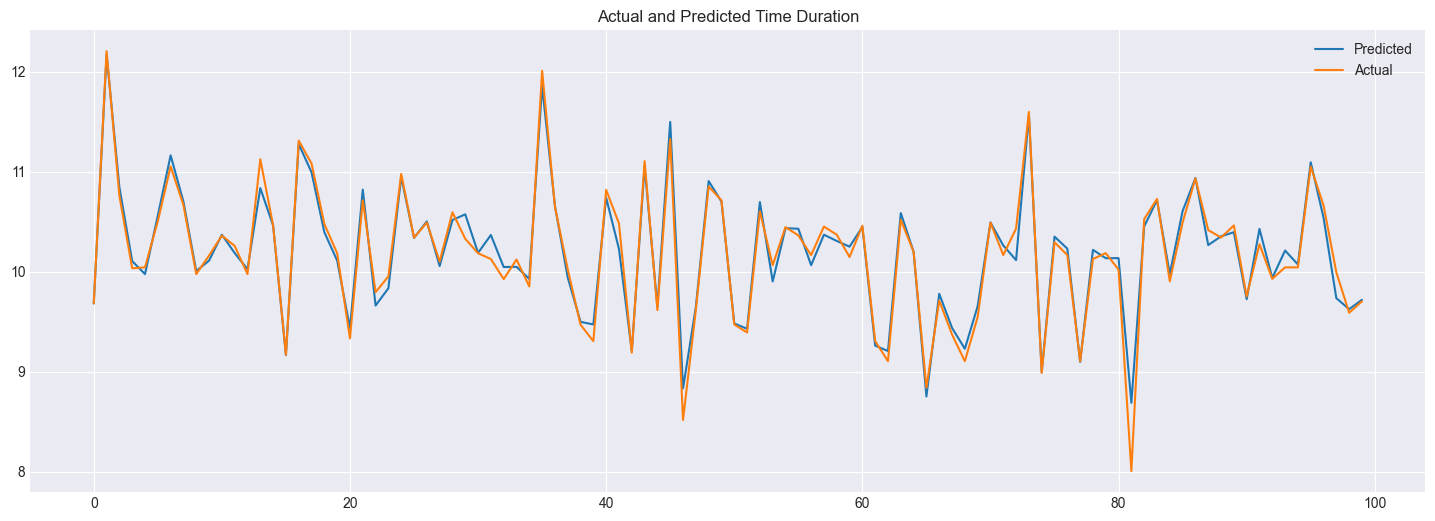

In [144]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lgb_train)

MSE: 0.0266 RMSE: 0.16309506430300091
R2: 0.9273615004954174 Adjusted R2: 0.9249741938278001
MAE: 0.11465137414859981


(0.0266,
 0.16309506430300091,
 0.9273615004954174,
 0.9249741938278001,
 0.11465137414859981)

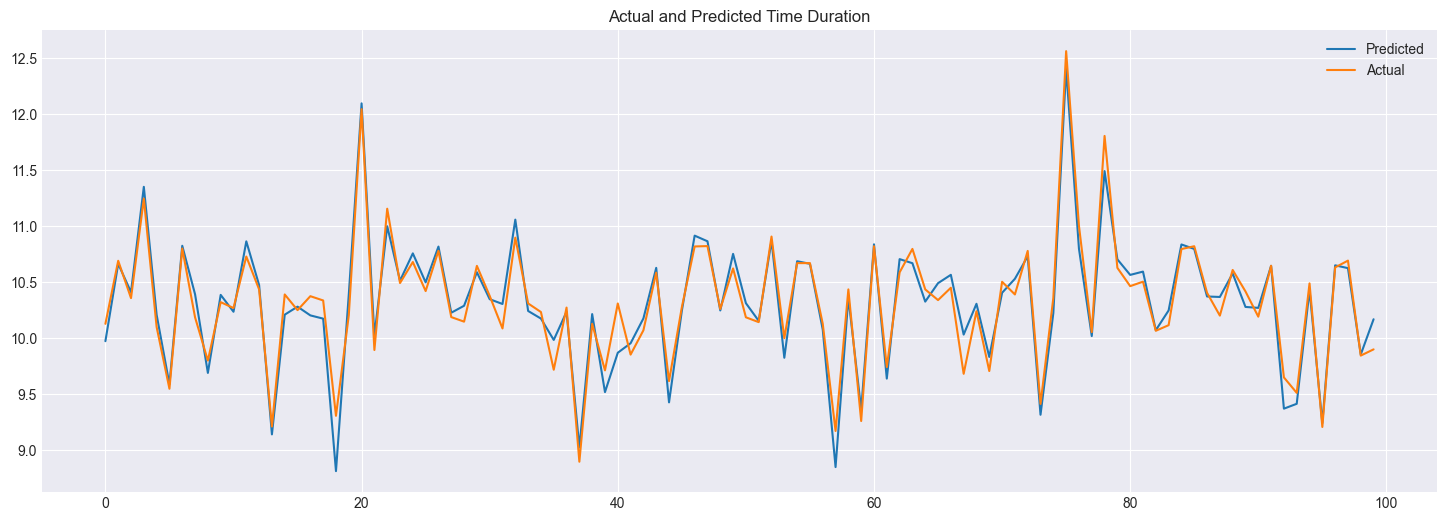

In [145]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_lgb_test)

### Cross Validation

In [146]:
from sklearn.model_selection import cross_val_score

regressor = LGBMRegressor()

# Menjalankan cross validation dengan 5 fold
scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Menghitung nilai MSE, RMSE, dan MAE dari cross validation scores
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
mae_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_absolute_error')

# Menampilkan hasil evaluasi dari cross validation
print("Cross Validation Results:")
print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"MAE Scores: {mae_scores}")
print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")

Cross Validation Results:
MSE Scores: [0.03733467 0.02757846 0.03050859 0.02772717 0.03403692]
RMSE Scores: [0.19322181 0.16606765 0.1746671  0.16651477 0.18449096]
MAE Scores: [-0.12160814 -0.11875936 -0.11909285 -0.12093926 -0.125289  ]
Average MSE: 0.03143716200685773
Average RMSE: 0.17699245747830322
Average MAE: -0.12113772158852172


### Feature Importance

In [147]:
best_model = gs_lgb.best_estimator_
feature_importance = best_model.feature_importances_

In [148]:
total_importance = sum(feature_importance)
normalized_importance = feature_importance / total_importance
percentage_importance = normalized_importance * 100

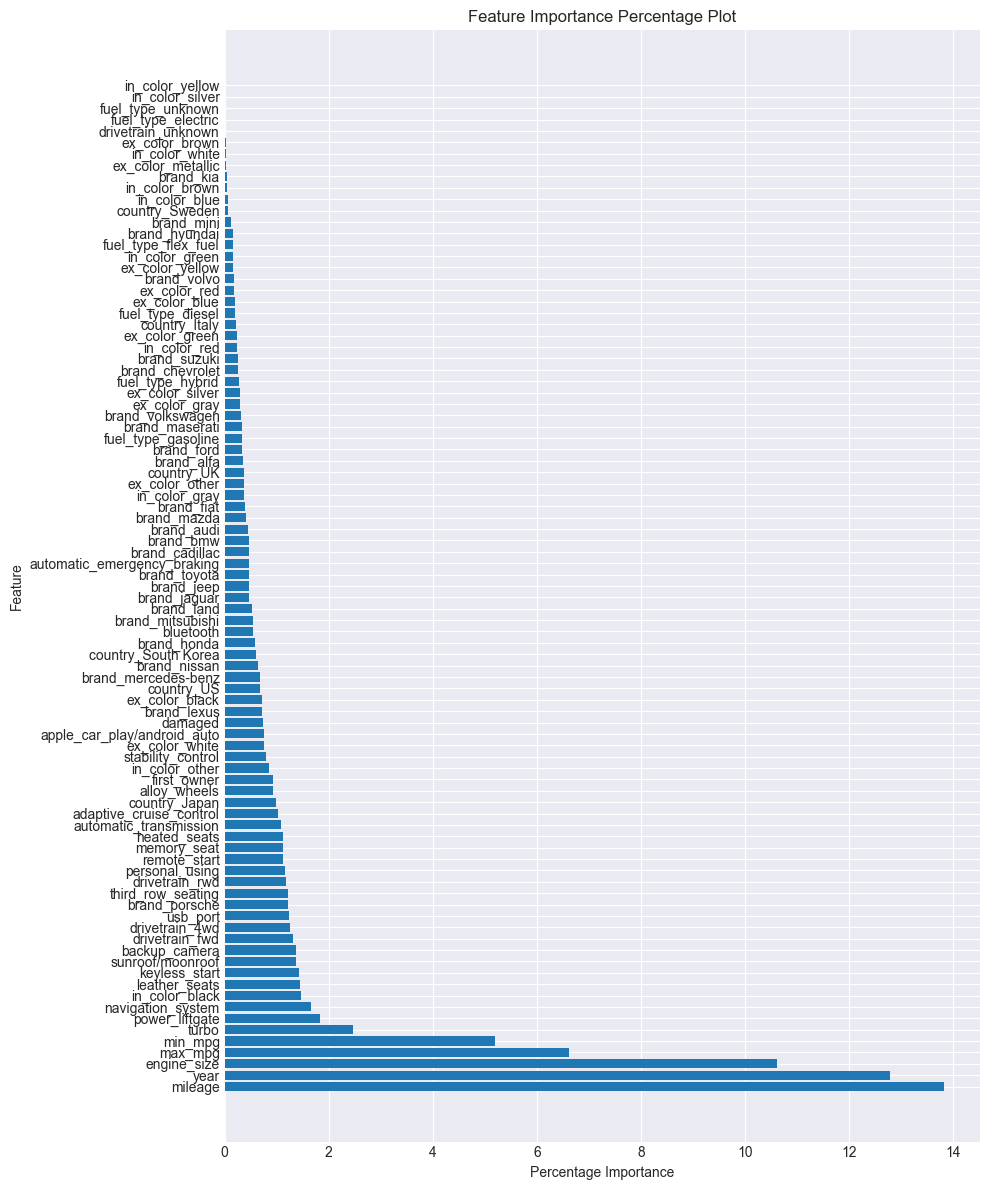

In [149]:
import matplotlib.pyplot as plt

# Buat DataFrame untuk menyimpan persentase feature importance dan nama fiturnya
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Percentage Importance': percentage_importance})

# Urutkan berdasarkan persentase importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by='Percentage Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Percentage Importance'])
plt.xlabel('Percentage Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Percentage Plot')
plt.tight_layout()
plt.show()

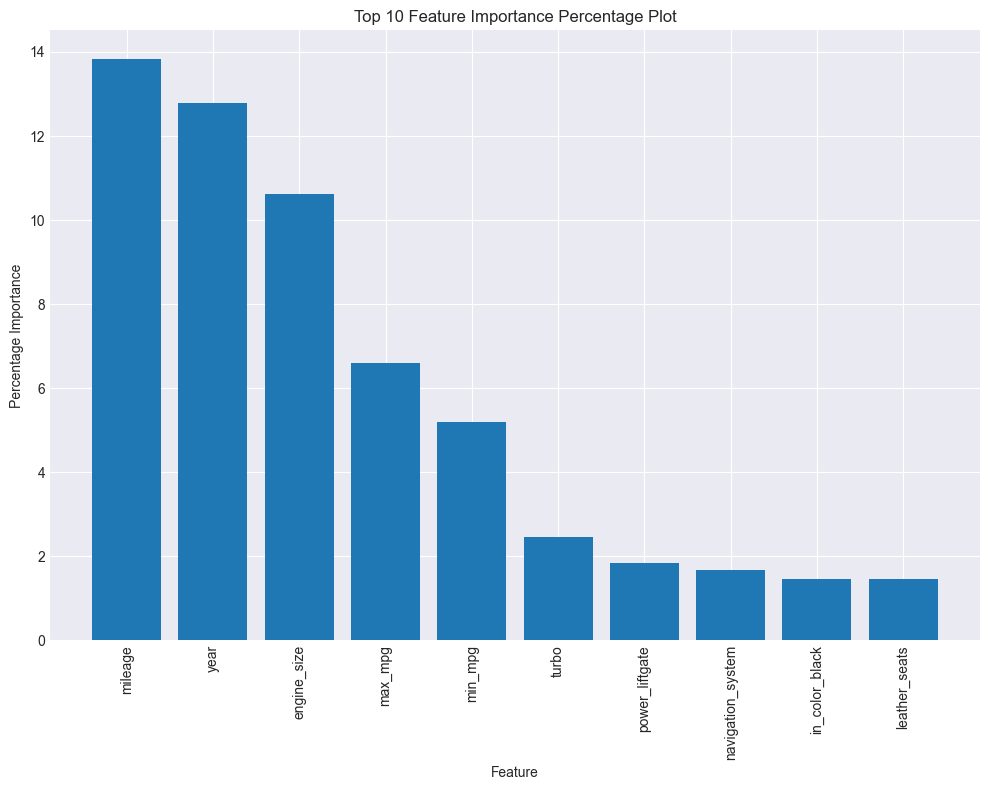

In [150]:
import matplotlib.pyplot as plt

# Buat DataFrame untuk menyimpan persentase feature importance dan nama fiturnya
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Percentage Importance': percentage_importance})

# Urutkan berdasarkan persentase importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by='Percentage Importance', ascending=False)

# Ambil hanya top 10 fitur dengan nilai importance tertinggi
top_10_features = feature_importance_df.head(10)

# Visualisasi
plt.figure(figsize=(10, 8))
plt.bar(top_10_features['Feature'], top_10_features['Percentage Importance'])
plt.ylabel('Percentage Importance')
plt.xlabel('Feature')
plt.title('Top 10 Feature Importance Percentage Plot')
plt.xticks(rotation=90)  # Untuk merotasi nama fitur pada sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

# Save Model

In [151]:
import pickle

In [152]:
gs_lgb_opt_model.booster_.save_model('lightgbm_best_model.model')
print("Model saved successfully in .model format.")

Model saved successfully in .model format.
